In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Chargement des données
#Pour éviter l'erreur de lecture de la ligne 2660 qui contient 55 colonnes
try:
    df = pd.read_csv('cumulative.csv', on_bad_lines='skip')
except TypeError:
    # Pour les versions récentes de Pandas
    df = pd.read_csv('cumulative.csv', error_bad_lines=False)
    ptin


In [2]:
#10 lignes aléatoires du dataset
df.sample(10)

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
4918,7596.0,9540450.0,K07187.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0.0,1.0,0,...,-364.0,4.397,0.112,-0.208,1.064,0.338,-0.182,297.09329,46.132381,14.146
4898,7576.0,6057750.0,K06657.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.184,1.0,0.0,0,...,-76.0,3.877,0.165,-0.135,2.512,0.599,-0.544,296.10400,41.369270,13.700
3467,6145.0,4856592.0,K05095.01,NaN,FALSE POSITIVE,FALSE POSITIVE,NaN,1.0,0.0,0,...,-92.0,3.222,0.029,-0.031,3.698,0.748,-0.118,296.93536,39.924927,11.372
9676,5448.0,11760860.0,K03892.01,Kepler-1525 b,CONFIRMED,CANDIDATE,1.000,0.0,0.0,0,...,-125.0,4.444,0.040,-0.128,1.026,0.159,-0.068,290.55951,49.943008,12.737
3741,6419.0,8622875.0,K05551.01,NaN,FALSE POSITIVE,FALSE POSITIVE,NaN,0.0,0.0,0,...,-144.0,4.375,0.128,-0.241,1.009,0.366,-0.150,291.08795,44.751789,14.012
1940,1941.0,6696580.0,K02092.02,Kepler-359 b,CONFIRMED,CANDIDATE,1.000,0.0,0.0,0,...,-261.0,4.441,0.065,-0.195,1.049,0.313,-0.134,293.29364,42.196350,15.886
2540,2541.0,6586746.0,K02747.01,Kepler-1335 b,CONFIRMED,CANDIDATE,1.000,0.0,0.0,0,...,-151.0,4.511,0.077,-0.056,0.817,0.071,-0.085,284.83841,42.070431,15.329
5906,8584.0,7416306.0,K05388.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.086,1.0,0.0,0,...,-145.0,3.704,0.784,-0.196,2.655,0.783,-1.697,280.52133,43.077068,13.668
355,356.0,3218908.0,K01108.02,Kepler-770 c,CONFIRMED,CANDIDATE,0.993,0.0,0.0,0,...,-118.0,3.317,0.210,-0.105,4.885,0.701,-1.636,286.49042,38.374908,14.604
10584,6356.0,7672215.0,K05411.01,NaN,CANDIDATE,CANDIDATE,0.903,0.0,0.0,0,...,-334.0,4.142,0.124,-0.202,1.752,0.581,-0.358,287.93747,43.377659,13.335


In [3]:
#Statistiques descriptives
df.describe()

,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,13793.000000,1.379300e+04,11101.000000,13793.000000,13793.000000,13793.000000,13793.000000,12974.000000,12974.000000,13793.000000,...,12961.000000,13126.000000,12978.000000,12978.000000,13126.000000,12978.000000,12978.000000,13792.000000,13792.000000,13790.000000
mean,5600.175541,7.700318e+06,0.419432,0.217592,0.252737,0.197926,81.921668,0.009287,-0.007976,168.841199,...,-167.220276,4.286673,0.126630,-0.148103,1.870654,0.396275,-0.442482,292.131535,43.820219,14.215114
std,2693.936289,2.640457e+06,1.242178,1.392983,0.451775,0.398451,1115.809170,0.755055,0.605819,72.941705,...,74.915962,0.462463,0.139226,0.088486,6.724524,0.967435,2.323394,4.751155,3.586970,1.406736
min,0.240000,-4.400000e-01,0.000000,-155.750000,0.000000,0.000000,0.241843,0.000000,-69.000000,3.939000,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,3449.000000,5.597361e+06,0.000000,0.000000,0.000000,0.000000,2.519899,0.000005,-0.000415,132.633300,...,-200.000000,4.179500,0.044000,-0.200000,0.833000,0.144000,-0.287000,288.789860,40.800720,13.380000
50%,6116.000000,7.917068e+06,0.001000,0.000000,0.000000,0.000000,10.116145,0.000038,-0.000038,136.932800,...,-165.000000,4.434000,0.072000,-0.140000,1.004000,0.272000,-0.116000,292.311650,43.689152,14.453000
75%,7840.000000,9.851360e+06,0.992000,0.000000,1.000000,0.000000,51.809828,0.000415,-0.000005,170.810440,...,-125.000000,4.540000,0.157000,-0.090000,1.412000,0.385000,-0.071000,295.921163,46.692180,15.306000
max,9564.000000,1.293514e+07,121.690000,1.000000,15.000000,1.000000,129995.778400,86.000000,0.000000,1472.522306,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


In [4]:
#Format du dataset
df.shape

(13793, 50)

In [5]:
# Méthode pour supprimer la ligne 2660 qui contient 55 colonnes
def remove_specific_line(input_file, output_file, line_number_to_remove):
    with open(input_file, 'r') as file_in:
        lines = file_in.readlines()
    
    # Vérifier que la ligne existe
    if line_number_to_remove <= len(lines):
        # Supprimer la ligne spécifique (ajuster l'index car Python commence à 0)
        del lines[line_number_to_remove - 1]
        
        # Écrire les lignes restantes dans un nouveau fichier
        with open(output_file, 'w') as file_out:
            file_out.writelines(lines)
        print(f"Ligne {line_number_to_remove} supprimée. Nouveau fichier créé: {output_file}")
    else:
        print(f"Erreur: Le fichier ne contient que {len(lines)} lignes.")

# Créer sans la ligne problématique
remove_specific_line('cumulative.csv', 'cumulative_cleaned.csv', 2660)

# Lire le fichier nettoyé
df = pd.read_csv('cumulative_cleaned.csv')
df.head()

Ligne 2660 supprimée. Nouveau fichier créé: cumulative_cleaned.csv


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1.0,10797460.0,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0.0,0.0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2.0,10797460.0,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0.0,0.0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3.0,10811496.0,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0.0,1.0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4.0,10848459.0,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0.0,1.0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5.0,10854555.0,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0.0,0.0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


Dimensions du dataset : (13793, 50)

Aperçu des données :
   rowid       kepid kepoi_name   kepler_name koi_disposition  \
0    1.0  10797460.0  K00752.01  Kepler-227 b       CONFIRMED   
1    2.0  10797460.0  K00752.02  Kepler-227 c       CONFIRMED   
2    3.0  10811496.0  K00753.01           NaN  FALSE POSITIVE   
3    4.0  10848459.0  K00754.01           NaN  FALSE POSITIVE   
4    5.0  10854555.0  K00755.01  Kepler-664 b       CONFIRMED   

  koi_pdisposition  koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  \
0        CANDIDATE      1.000            0.0            0.0              0   
1        CANDIDATE      0.969            0.0            0.0              0   
2   FALSE POSITIVE      0.000            0.0            1.0              0   
3   FALSE POSITIVE      0.000            0.0            1.0              0   
4        CANDIDATE      1.000            0.0            0.0              0   

   ... koi_steff_err2  koi_slogg  koi_slogg_err1  koi_slogg_err2  koi_srad  \
0  .

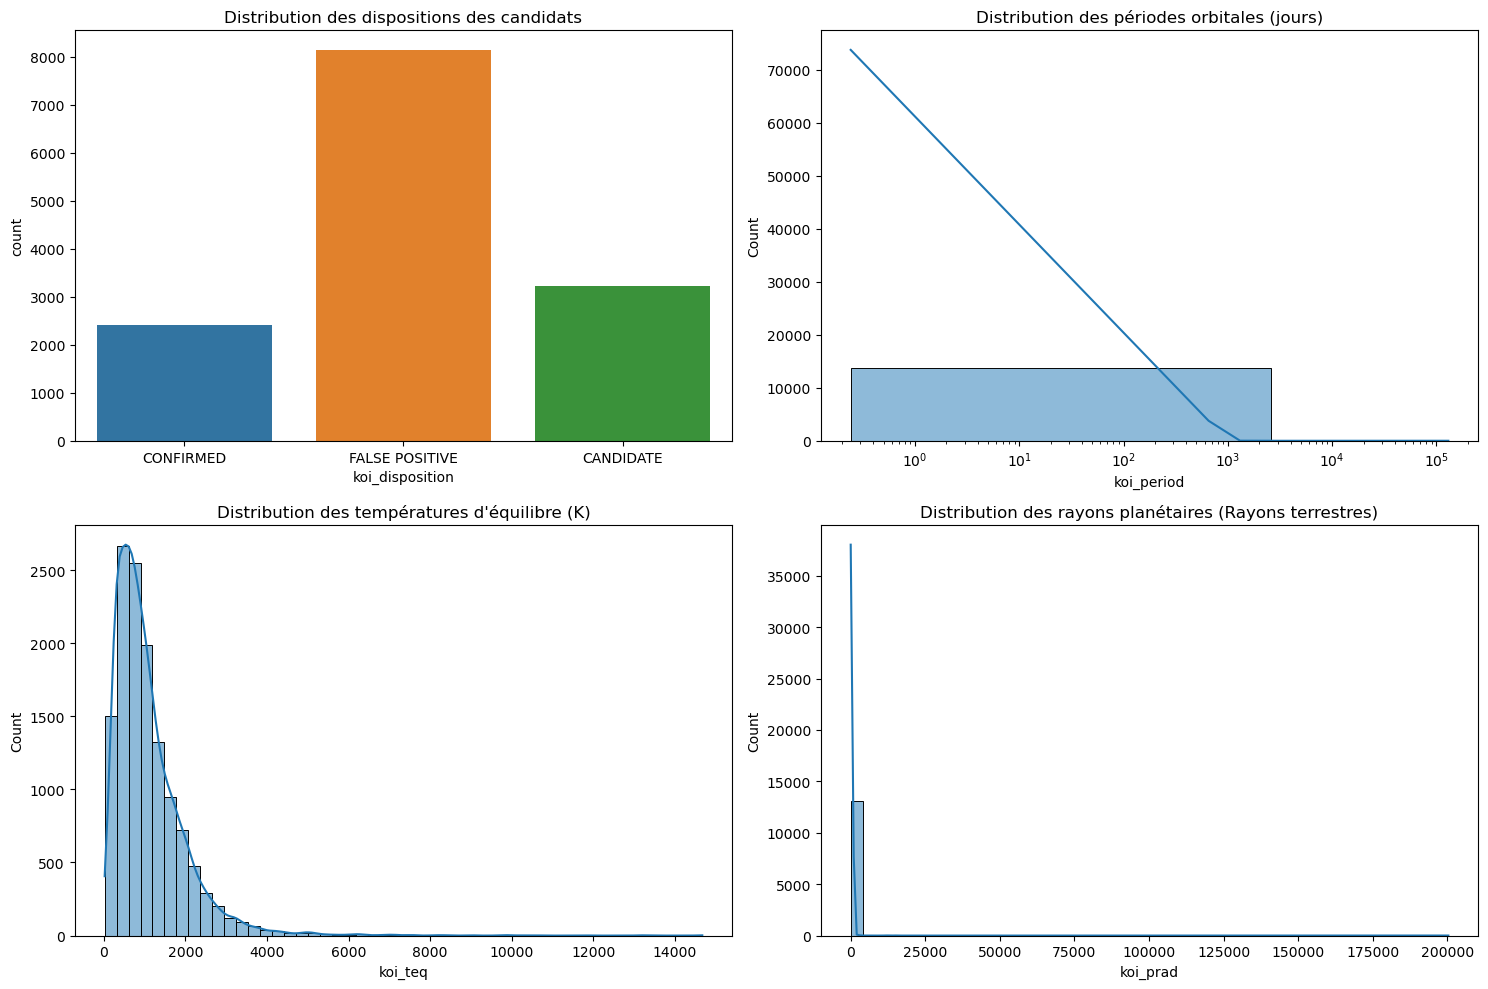

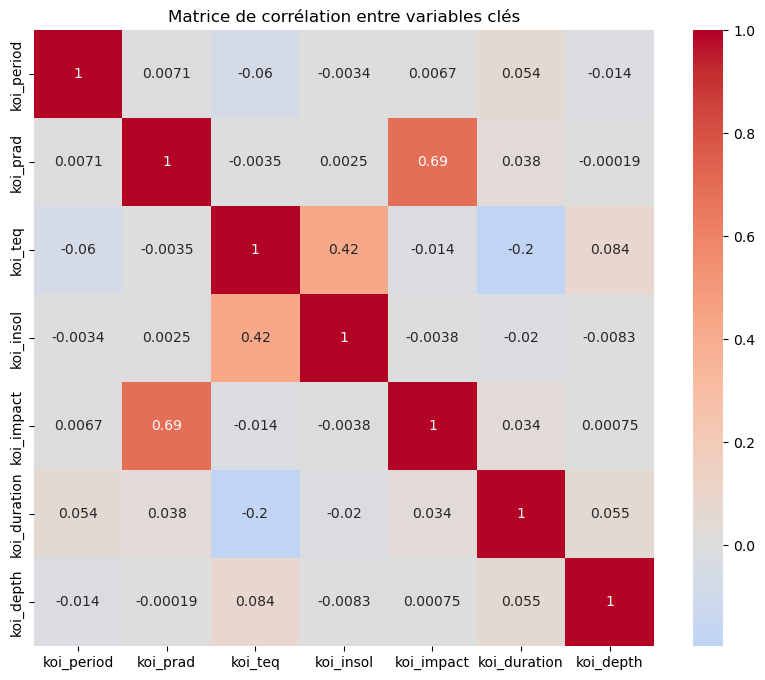


Nombre de systèmes avec plusieurs planètes candidates : 4674


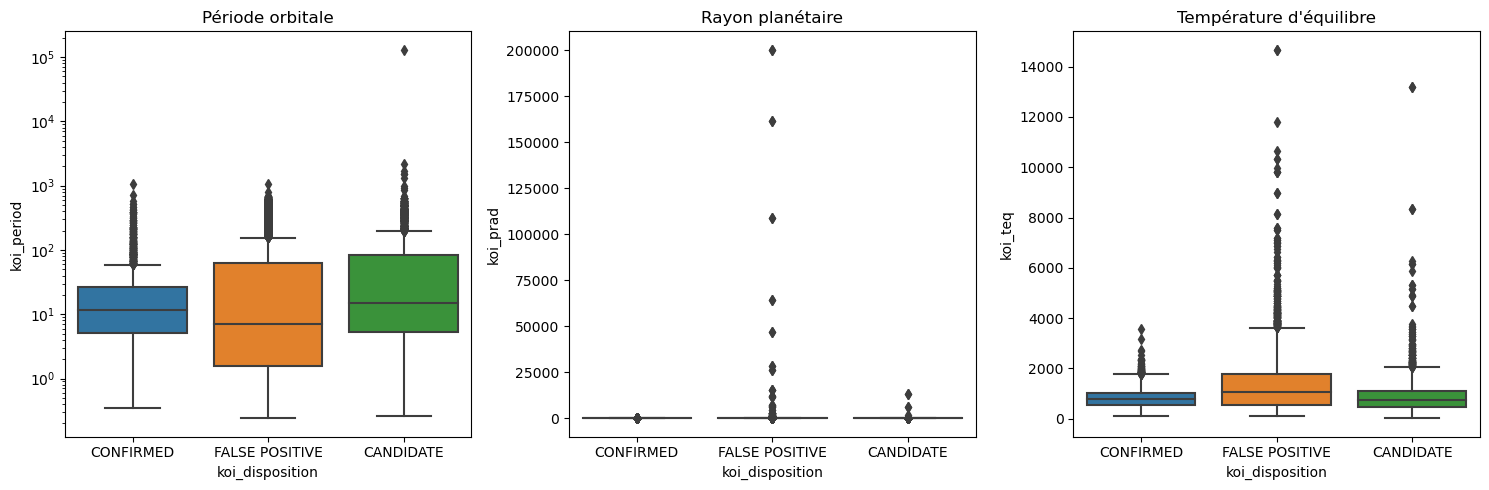

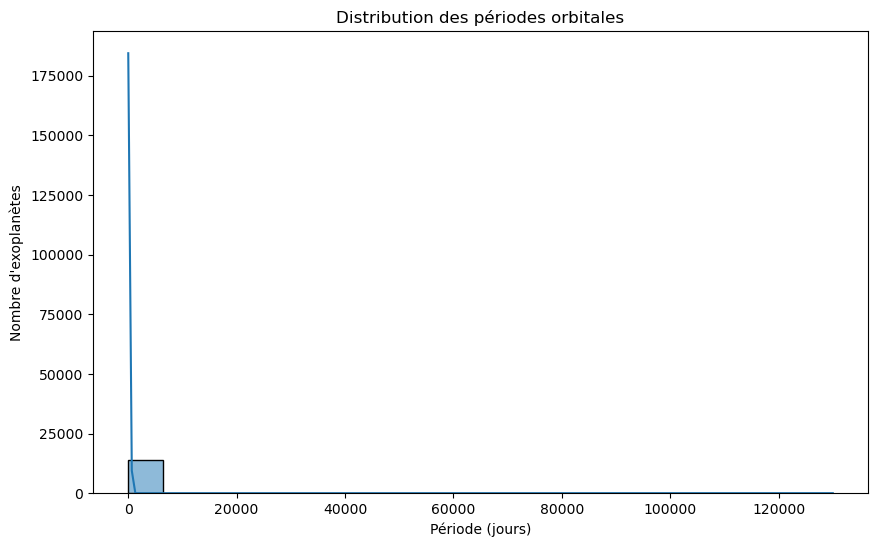

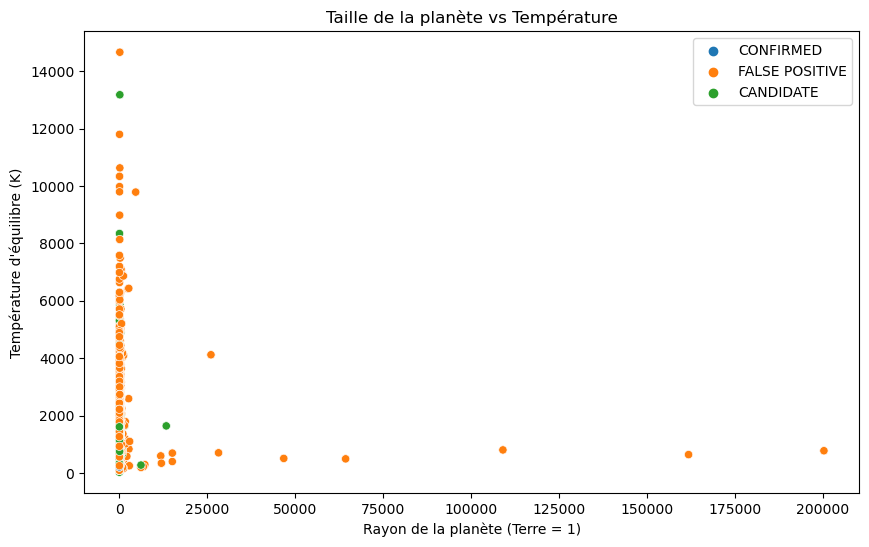

            koi_prad       koi_teq    koi_impact     koi_depth
count   13126.000000  13126.000000  13127.000000  1.312600e+04
mean      136.643774   1111.146122      0.787024  2.938591e+04
std      3640.554929    906.104733      3.842646  9.184607e+04
min         0.080000     25.000000      0.000000  0.000000e+00
25%         1.400000    522.000000      0.203200  1.546000e+02
50%         2.460000    885.000000      0.534000  4.180000e+02
75%        22.320000   1447.000000      0.895000  1.901000e+03
max    200346.000000  14667.000000    100.806000  1.541400e+06
====================== Types de données et forme du dataset==========================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13793 entries, 0 to 13792
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              13793 non-null  float64
 1   kepid              13793 non-null  float64
 2   kepoi_name         13793 non-null  object

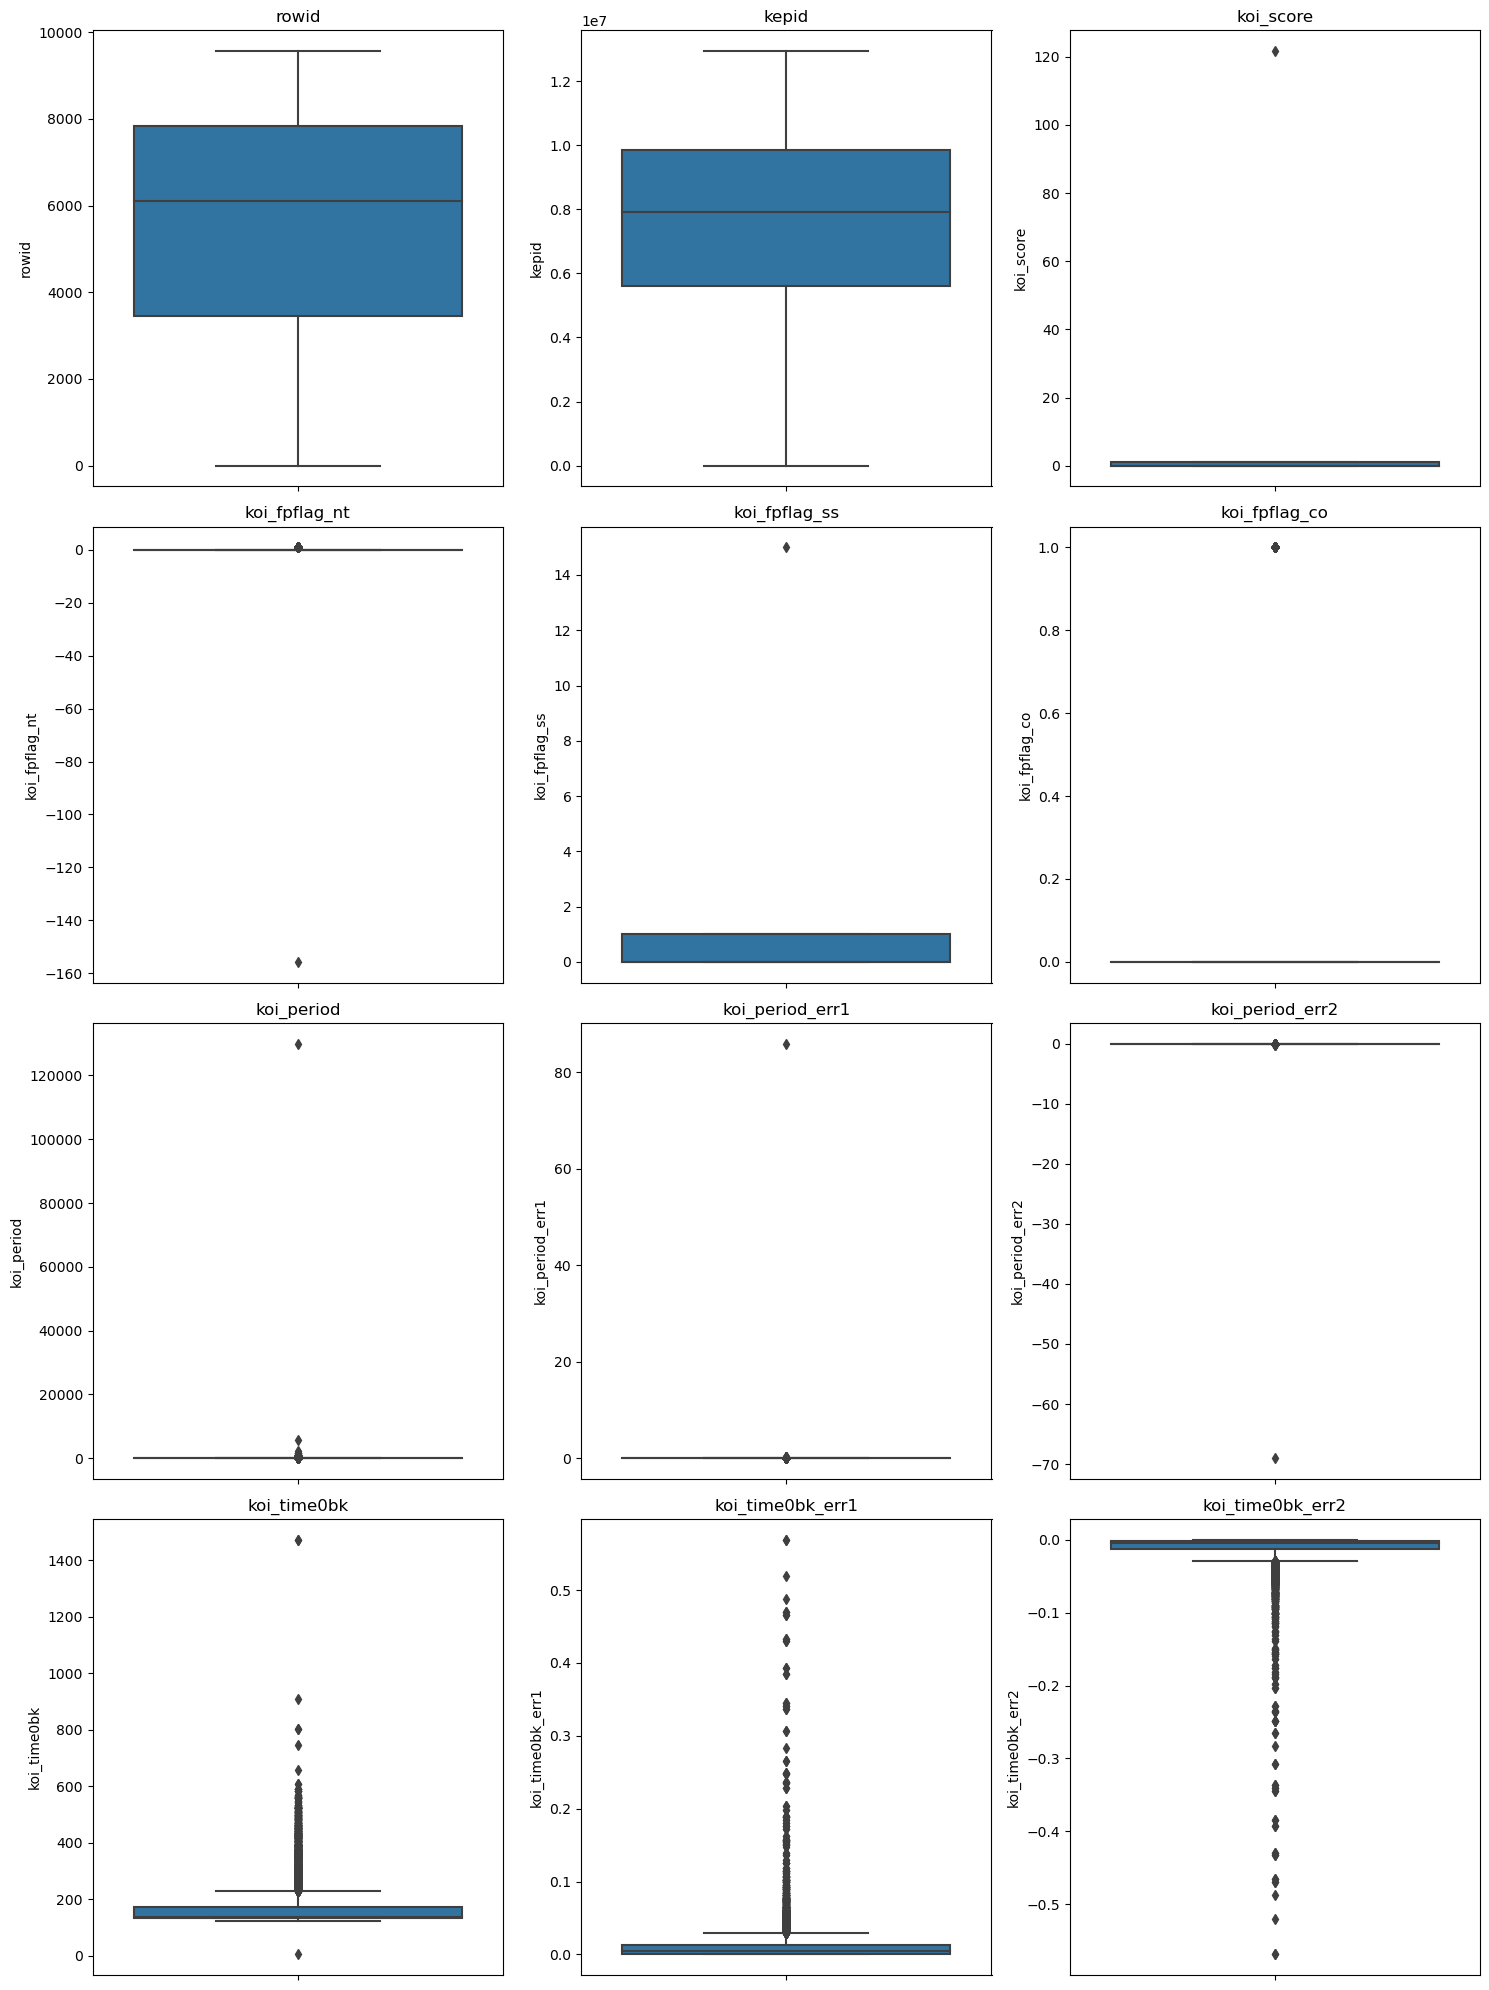

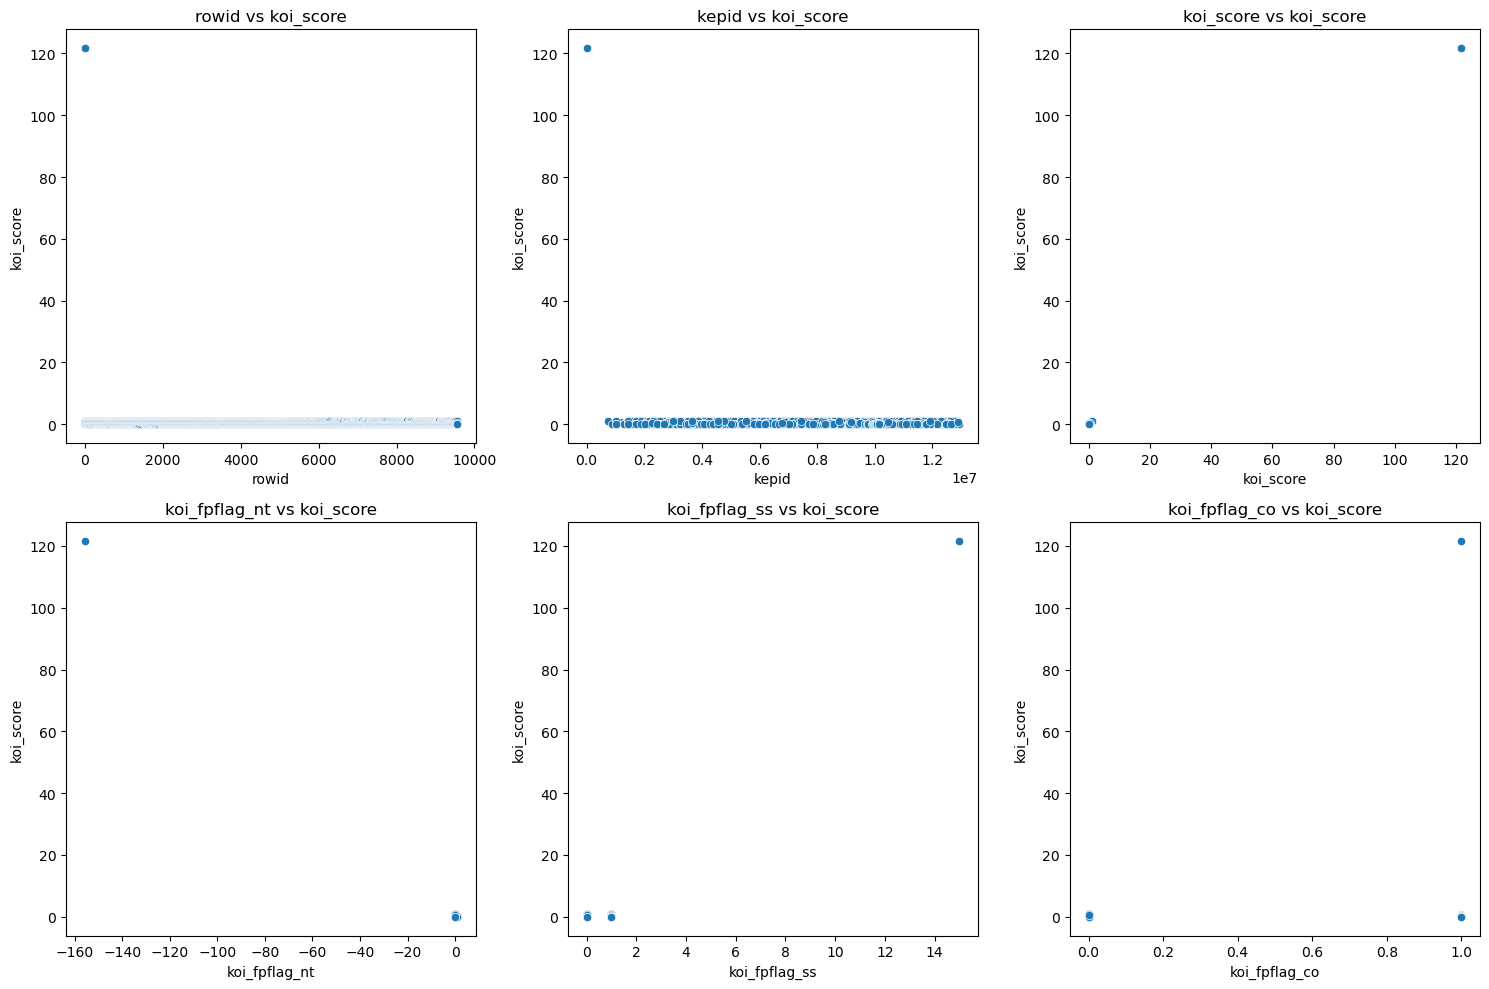

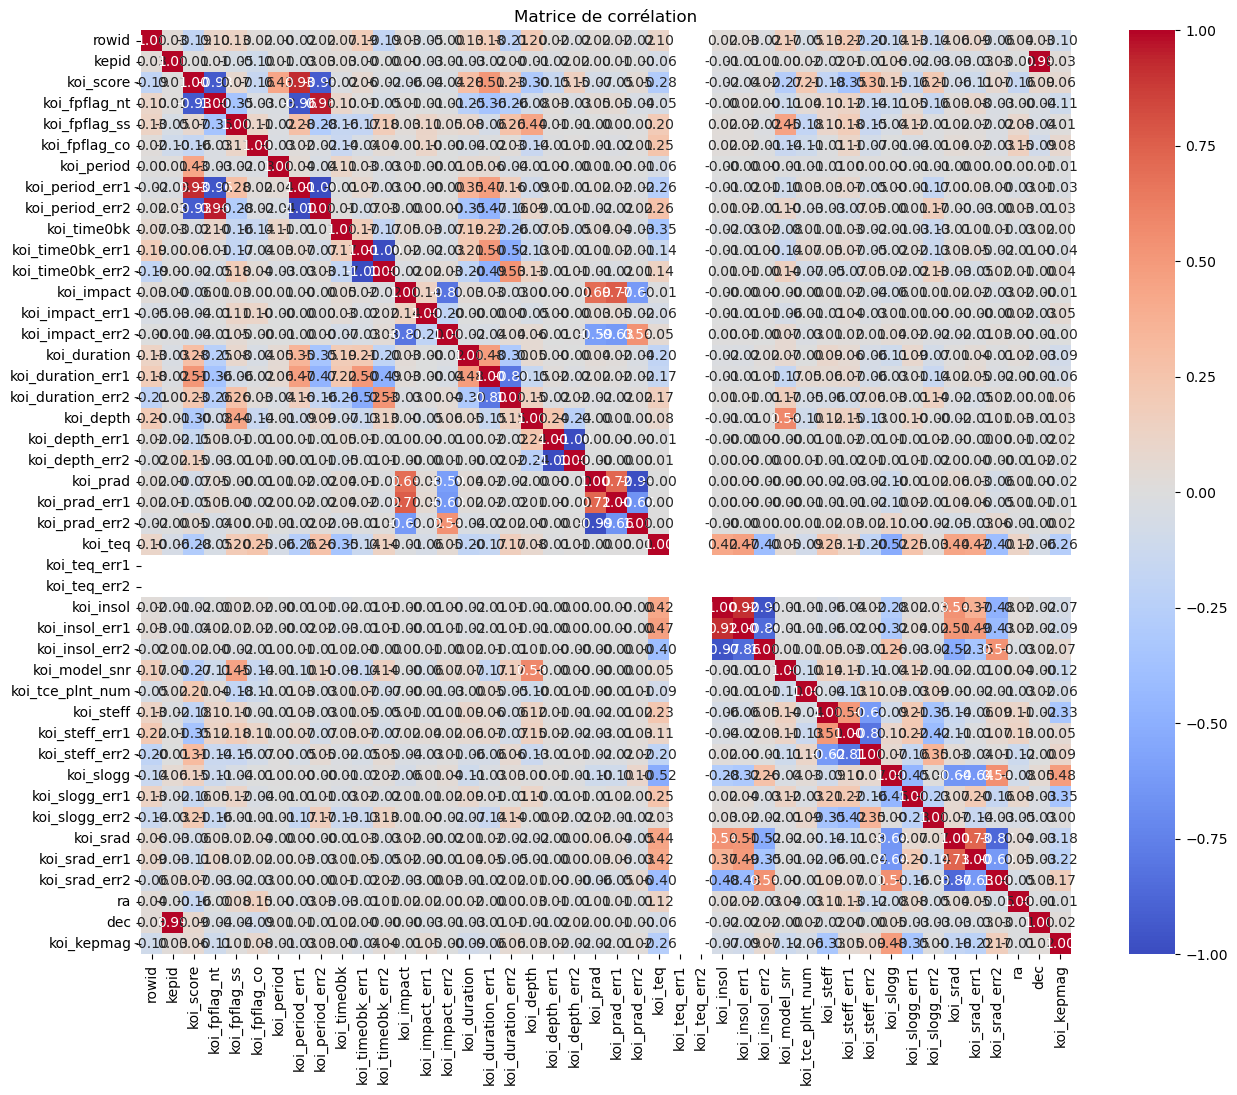


============================Variables catégorielles =====================================

kepoi_name:
kepoi_name
K06507.01    2
K03371.02    2
K03090.02    2
K03088.02    2
K03028.02    2
            ..
K02354.01    1
K02353.01    1
K02286.01    1
K00236.01    1
K03868.01    1
Name: count, Length: 9564, dtype: int64

kepler_name:
kepler_name
Kepler-1639 b    2
Kepler-1641 c    2
Kepler-1567 b    2
Kepler-116 c     2
Kepler-755 c     2
                ..
Kepler-326 b     1
Kepler-326 c     1
Kepler-354 b     1
Kepler-1068 b    1
Kepler-1523 b    1
Name: count, Length: 2294, dtype: int64

koi_disposition:
koi_disposition
FALSE POSITIVE    8145
CANDIDATE         3231
CONFIRMED         2416
Name: count, dtype: int64

koi_pdisposition:
koi_pdisposition
FALSE POSITIVE    8196
CANDIDATE         5596
355.29               1
Name: count, dtype: int64

koi_fpflag_ec:
koi_fpflag_ec
0                  12066
1                   1726
q1_q17_dr25_tce        1
Name: count, dtype: int64

koi_tce_deliv

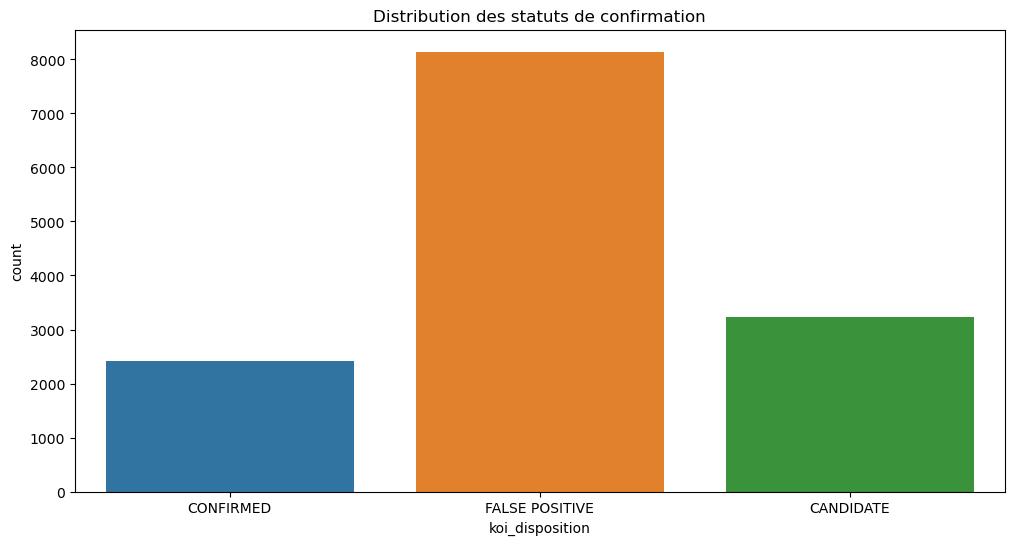

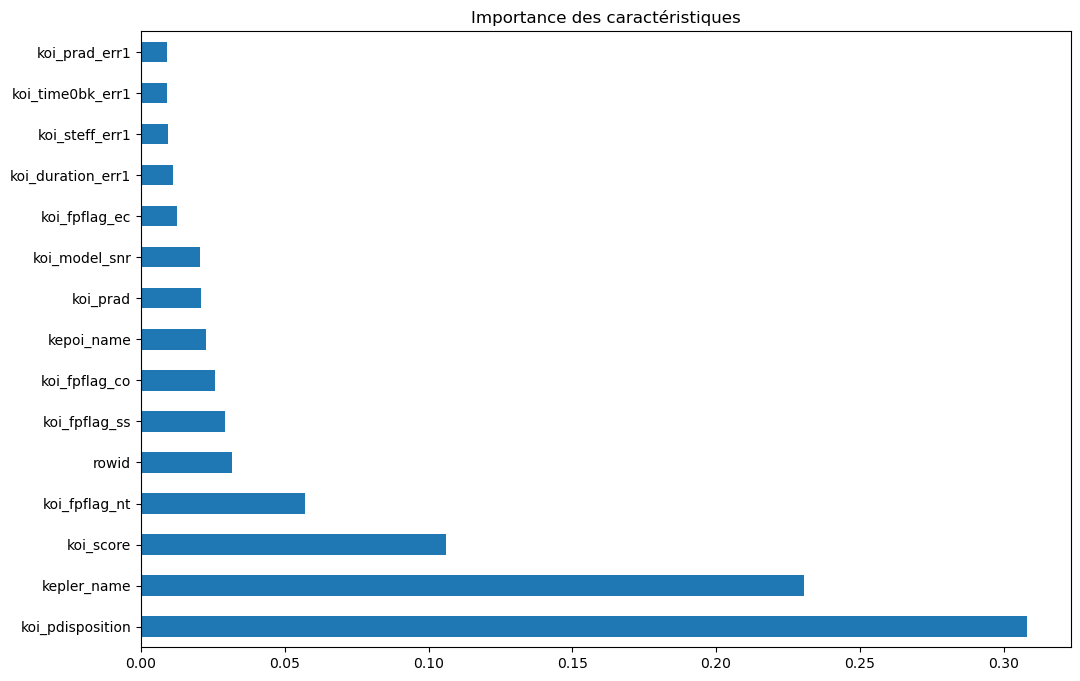

In [6]:
# Aperçu initial
print(f"Dimensions du dataset : {df.shape}")
print("\nAperçu des données :")
print(df.head())
print("\nInformations sur les colonnes :")
print(df.info())
print("\nStatistiques descriptives :")
print(df.describe())

# Analyse des variables clés
plt.figure(figsize=(15, 10))

# Distribution des dispositions
plt.subplot(2, 2, 1)
sns.countplot(x='koi_disposition', data=df)
plt.title('Distribution des dispositions des candidats')

# Distribution des périodes orbitales
plt.subplot(2, 2, 2)
sns.histplot(df['koi_period'], bins=50, kde=True)
plt.title('Distribution des périodes orbitales (jours)')
plt.xscale('log')

# Distribution des températures d'équilibre
plt.subplot(2, 2, 3)
sns.histplot(df['koi_teq'], bins=50, kde=True)
plt.title('Distribution des températures d\'équilibre (K)')

# Distribution des rayons planétaires
plt.subplot(2, 2, 4)
sns.histplot(df['koi_prad'], bins=50, kde=True)
plt.title('Distribution des rayons planétaires (Rayons terrestres)')

plt.tight_layout()
plt.show()

# Analyse des corrélations
corr_cols = ['koi_period', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_impact', 'koi_duration', 'koi_depth']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation entre variables clés')
plt.show()

# Analyse des systèmes multi-planétaires
multi_planet = df['kepid'].value_counts()
multi_planet = multi_planet[multi_planet > 1].count()
print(f"\nNombre de systèmes avec plusieurs planètes candidates : {multi_planet}")

# Comparaison des caractéristiques entre confirmés et faux positifs
confirmed = df[df['koi_disposition'] == 'CONFIRMED']
fp = df[df['koi_disposition'] == 'FALSE POSITIVE']

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='koi_disposition', y='koi_period', data=df)
plt.yscale('log')
plt.title('Période orbitale')

plt.subplot(1, 3, 2)
sns.boxplot(x='koi_disposition', y='koi_prad', data=df)
plt.title('Rayon planétaire')

plt.subplot(1, 3, 3)
sns.boxplot(x='koi_disposition', y='koi_teq', data=df)
plt.title('Température d\'équilibre')

plt.tight_layout()
plt.show()


#Distribution des périodes orbitales
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='koi_period', bins=20, kde=True)
plt.title('Distribution des périodes orbitales')
plt.xlabel('Période (jours)')
plt.ylabel('Nombre d\'exoplanètes')
plt.show()

# Relation taille de la planète et température
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='koi_prad', y='koi_teq', hue='koi_disposition')
plt.title('Taille de la planète vs Température')
plt.xlabel('Rayon de la planète (Terre = 1)')
plt.ylabel('Température d\'équilibre (K)')
plt.legend()
plt.show()

# Statistiques descriptives de certains prédicteurs
print(df[['koi_prad', 'koi_teq', 'koi_impact', 'koi_depth']].describe())

#Statistiques de base et types de données
print("====================== Types de données et forme du dataset==========================")
print(df.info())
print("\n======================Statistiques descriptives ==============================")
print(df.describe(include='all'))

# Valeurs manquantes
print("\n============================Valeurs manquantes ================================")
missing = df.isnull().sum()
print(missing[missing > 0])

# Analyse des variables numériques
num_cols = df.select_dtypes(include=np.number).columns

# Boxplots pour détection d'outliers
plt.figure(figsize=(15, 20))
for i, col in enumerate(num_cols[:12]):  # Ajuster selon besoin
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Linéarité et relations variables
target = 'koi_score'  # À adapter selon l'objectif
if target in df.columns:
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(num_cols[:6]):
        plt.subplot(2, 3, i+1)
        sns.scatterplot(x=df[col], y=df[target])
        plt.title(f"{col} vs {target}")
    plt.tight_layout()
    plt.show()

# Heatmap de corrélation
plt.figure(figsize=(15, 12))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

#Variables catégorielles
cat_cols = df.select_dtypes(include='object').columns
print("\n============================Variables catégorielles =====================================")
for col in cat_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

# Visualisation des principales catégories
plt.figure(figsize=(12, 6))
sns.countplot(x='koi_disposition', data=df)
plt.title("Distribution des statuts de confirmation")
plt.show()

# Variables importantes en utilisant Random Forest
# Préparation des données
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

X = df_encoded.drop('koi_disposition', axis=1)
y = df_encoded['koi_disposition']

# Entraînement modèle
model = RandomForestClassifier()
model.fit(X, y)

# Visualisation importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(12, 8))
feature_importances.nlargest(15).plot(kind='barh')
plt.title("Importance des caractéristiques")
plt.show()

## Notebook 2: Pré-traitement

In [7]:
#Suppression du rowid, car il est inutile pour la modélisation
df = df.drop('rowid', axis=1)

#Affichage des dimensions du dataset original avant prétraitement
print(f"Dimensions originales du dataset: {df.shape}")
    
# Vérifier les valeurs manquantes initiales
missing_count = df.isna().sum().sum()
print(f"Nombre total de valeurs manquantes dans le dataset original: {missing_count}")
    
# Réinitialiser l'indexe pour éviter tout problème d'alignement
df = df.reset_index(drop=True)
   
# Supprimer les lignes avec valeur manquante dans la cible
print("Suppression des lignes avec valeurs manquantes dans la cible...")
df = df.dropna(subset=['koi_disposition']).reset_index(drop=True)
    
# Identifier les colonnes
y = df['koi_disposition'].copy()
X_raw = df.drop('koi_disposition', axis=1).copy()
    
num_cols = X_raw.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_raw.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Colonnes numériques: {len(num_cols)}")
print(f"Colonnes catégorielles: {len(cat_cols)}")
    
# Remplacement des valeurs manquantes
print("Remplacement de toutes les valeurs manquantes...")
    
# Traitement les colonnes numériques
for col in num_cols:
    if X_raw[col].isna().any():
        med_val = X_raw[col].median()
        if pd.isna(med_val):  # Si la médiane est aussi NaN
            X_raw[col] = X_raw[col].fillna(0)
        else:
            X_raw[col] = X_raw[col].fillna(med_val)
    
# Traiter les colonnes catégorielles
for col in cat_cols:
    if X_raw[col].isna().any():
        if X_raw[col].mode().empty:
            X_raw[col] = X_raw[col].fillna("missing")
        else:
            X_raw[col] = X_raw[col].fillna(X_raw[col].mode()[0])
    
# Vérification des valeurs manquantes
missing_after = X_raw.isna().sum().sum()
print(f"Valeurs manquantes après remplacement: {missing_after}")
    
if missing_after > 0:
    print("Remplacement final des valeurs manquantes par 0...")
    X_raw = X_raw.fillna(0)
    
# Encodage des variables catégorielles
print("Encodage des variables catégorielles...")
X_encoded = pd.get_dummies(X_raw, drop_first=False)
    
# Standardisation
print("Standardisation des variables numériques...")

# Créer un nouveau DataFrame pour stocker les données standardisées
X_scaled = X_encoded.copy()
    
# Standardiser uniquement les colonnes numériques originales
num_cols_exist = [col for col in num_cols if col in X_scaled.columns]
if num_cols_exist:
    scaler = StandardScaler()
    X_scaled[num_cols_exist] = scaler.fit_transform(X_scaled[num_cols_exist])
    
# Vérification finale des valeurs manquantes
missing_final = X_scaled.isna().sum().sum()
print(f"Valeurs manquantes finales: {missing_final}")
    
if missing_final > 0:
    X_scaled = X_scaled.fillna(0)


#Traitement des valeurs aberrantes
    
# Sélection des caractéristiques à l'aide de SelectKBest
print("Application de SelectKBest...")

    
# Vérification supplémentaire pour s'assurer qu'il n'y a pas de NaN, remplacer par 0
if X_scaled.isna().sum().sum() > 0:
    X_scaled = X_scaled.fillna(0)
    
# Application de SelectKBest
k = min(15, X_scaled.shape[1])
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X_scaled.values, y.values)
    
# Obtention des noms des caractéristiques sélectionnées
mask = selector.get_support()
selected_features = X_scaled.columns[mask].tolist()
    
# Création du dataframe final
df_final = pd.DataFrame(X_selected, columns=selected_features)
df_final['koi_disposition'] = y.values
    
# Sauvegarder le dasta
df_final.to_csv('data_clean.csv', index=False)
    
print(f"Prétraitement terminé avec succès!")
print(f"Dimensions finales du dataset: {df_final.shape}")
print(f"Caractéristiques sélectionnées: {selected_features}")
    

Dimensions originales du dataset: (13793, 49)
Nombre total de valeurs manquantes dans le dataset original: 64065
Suppression des lignes avec valeurs manquantes dans la cible...
Colonnes numériques: 43
Colonnes catégorielles: 5
Remplacement de toutes les valeurs manquantes...
Valeurs manquantes après remplacement: 0
Encodage des variables catégorielles...
Standardisation des variables numériques...
Valeurs manquantes finales: 0
Application de SelectKBest...


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [24 25] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Prétraitement terminé avec succès!
Dimensions finales du dataset: (13792, 16)
Caractéristiques sélectionnées: ['koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_depth', 'koi_teq', 'koi_model_snr', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg_err2', 'kepler_name_Kepler-1016 c', 'koi_pdisposition_CANDIDATE', 'koi_pdisposition_FALSE POSITIVE', 'koi_fpflag_ec_0', 'koi_fpflag_ec_1']


Chargement du fichier data_clean.csv...
Chargement réussi!

Dimensions du jeu de données: 13792 lignes × 16 colonnes

Apperçu des premières lignes:
   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_depth  \
0   1.494829      -0.544839      -0.579918      -0.496667  -0.304760   
1   1.425771      -0.544839      -0.579918      -0.496667  -0.301876   
2  -0.732824      -0.544839       1.724382      -0.496667  -0.191043   
3  -0.732824      -0.544839       1.724382      -0.496667  -0.221660   
4   1.494829      -0.544839      -0.579918      -0.496667  -0.304899   

    koi_teq  koi_model_snr  koi_steff_err1  koi_steff_err2  koi_slogg_err2  \
0 -0.347049      -0.294769       -1.491495        1.185387        0.601323   
1 -0.742417      -0.306143       -1.491495        1.185387        0.601323   
2 -0.522141      -0.248704        0.208338       -0.122736       -0.330507   
3  0.332984       0.239586        0.186263       -0.095197       -0.237324   
4  0.345409      -0.288969   

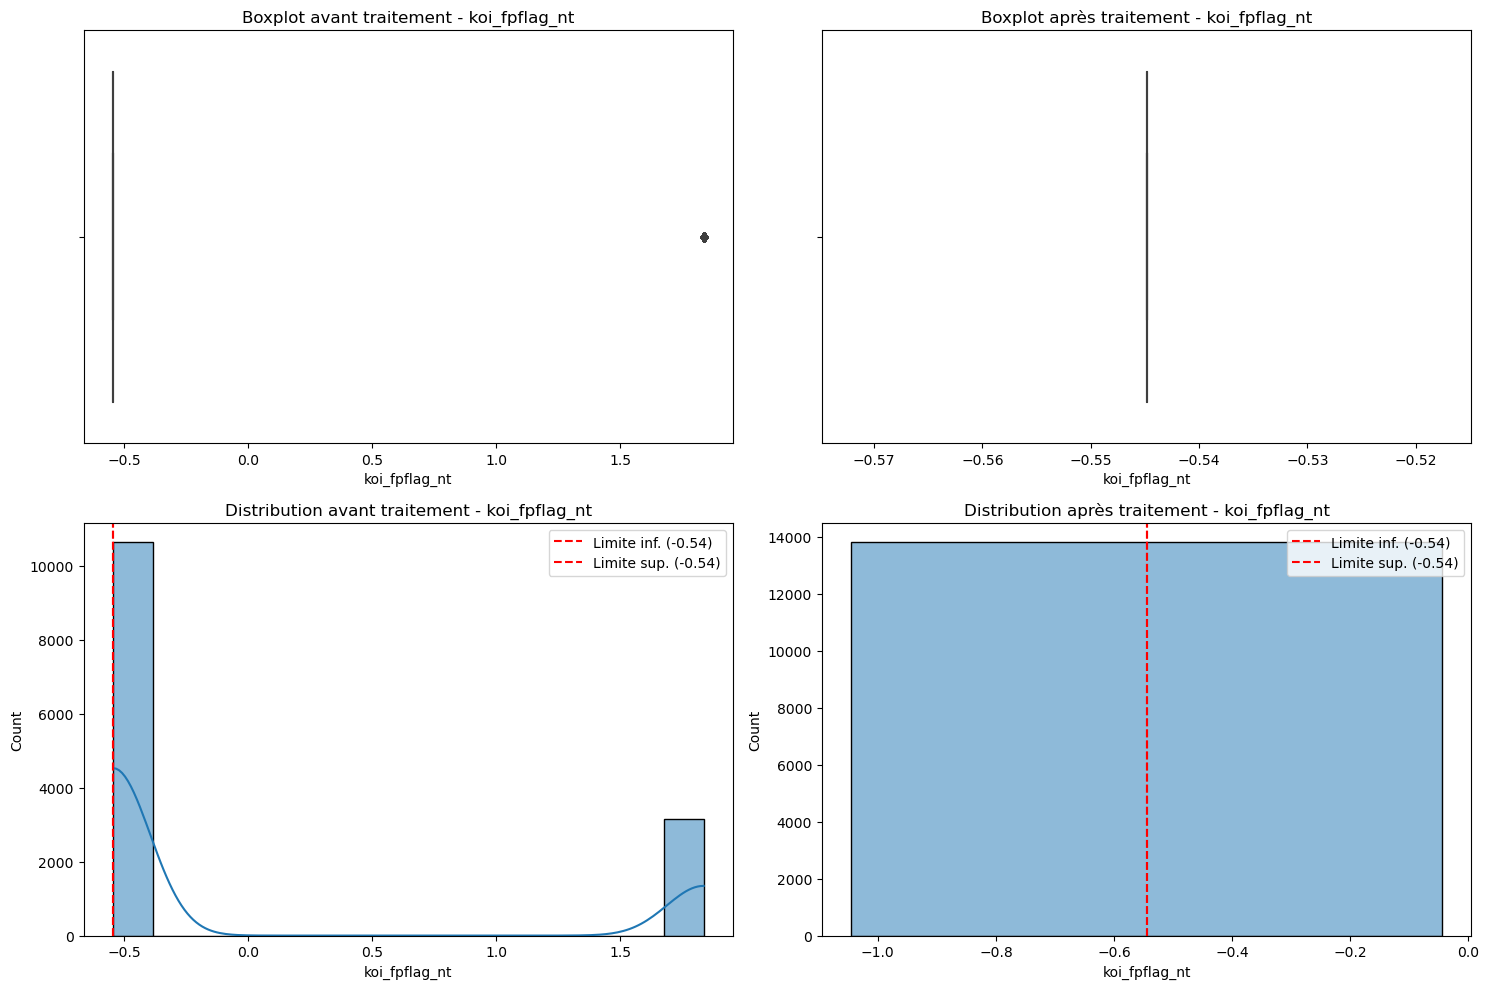


==== Traitement de la colonne 'koi_fpflag_ss' ====
Statistiques avant traitement:
count    1.379200e+04
mean     2.472887e-17
std      1.000036e+00
min     -5.799178e-01
25%     -5.799178e-01
50%     -5.799178e-01
75%      1.724382e+00
max      1.724382e+00
Name: koi_fpflag_ss, dtype: float64

Méthode IQR (seuil=1.5):
Q1: -0.58, Q3: 1.72, IQR: 2.30
Limite inférieure: -4.04, Limite supérieure: 5.18

Nombre d'outliers détectés: 0 (0.00% des données)
Aucun outlier détecté pour la colonne 'koi_fpflag_ss' avec la méthode iqr (seuil=1.5).

==== Traitement de la colonne 'koi_fpflag_co' ====
Statistiques avant traitement:
count    1.379200e+04
mean     5.357921e-17
std      1.000036e+00
min     -4.966670e-01
25%     -4.966670e-01
50%     -4.966670e-01
75%     -4.966670e-01
max      2.013421e+00
Name: koi_fpflag_co, dtype: float64

Méthode IQR (seuil=1.5):
Q1: -0.50, Q3: -0.50, IQR: 0.00
Limite inférieure: -0.50, Limite supérieure: -0.50

Nombre d'outliers détectés: 2729 (19.79% des données)
E

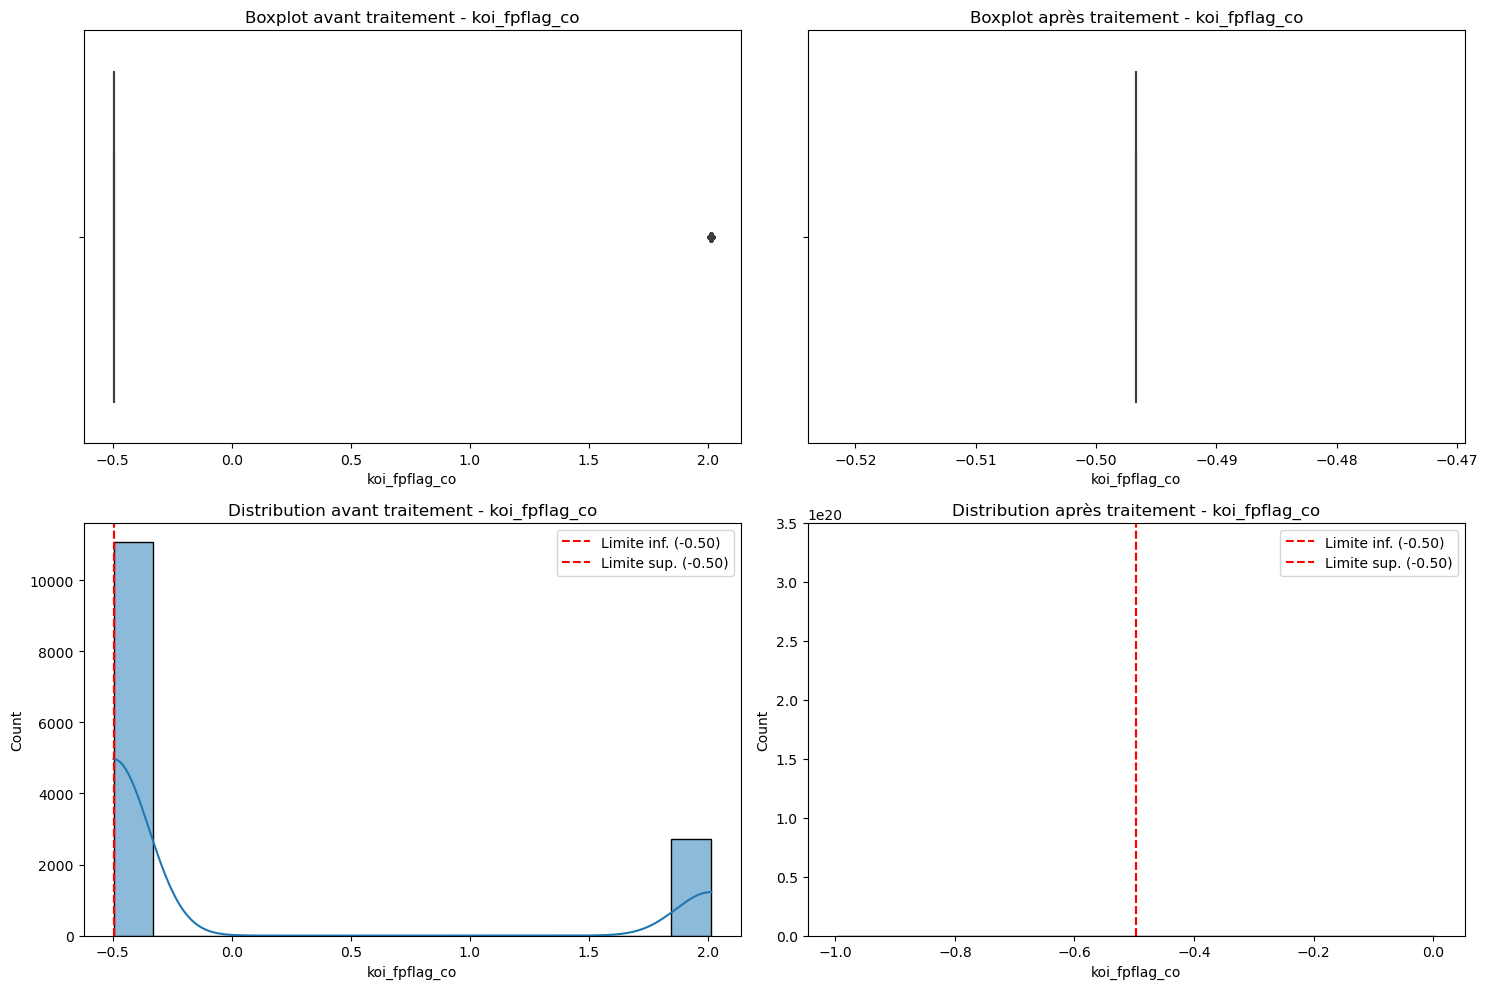


==== Traitement de la colonne 'koi_depth' ====
Statistiques avant traitement:
count    1.379200e+04
mean     9.067251e-17
std      1.000036e+00
min     -3.116164e-01
25%     -3.097987e-01
50%     -3.069623e-01
75%     -2.939109e-01
max      1.685079e+01
Name: koi_depth, dtype: float64

Méthode IQR (seuil=1.5):
Q1: -0.31, Q3: -0.29, IQR: 0.02
Limite inférieure: -0.33, Limite supérieure: -0.27

Nombre d'outliers détectés: 2818 (20.43% des données)
Exemples de valeurs aberrantes:
[-0.1910431330678329, -0.2216602179057485, -0.2568991486656288, -0.1531642609249176, -0.237298335461517]

Traitement: Écrêtage aux limites (capping)
Valeurs écrêtées à [-0.33, -0.27]

Statistiques après traitement:
count    13792.000000
mean        -0.298806
std          0.015655
min         -0.311616
25%         -0.309799
50%         -0.306962
75%         -0.293911
max         -0.270079
Name: koi_depth, dtype: float64


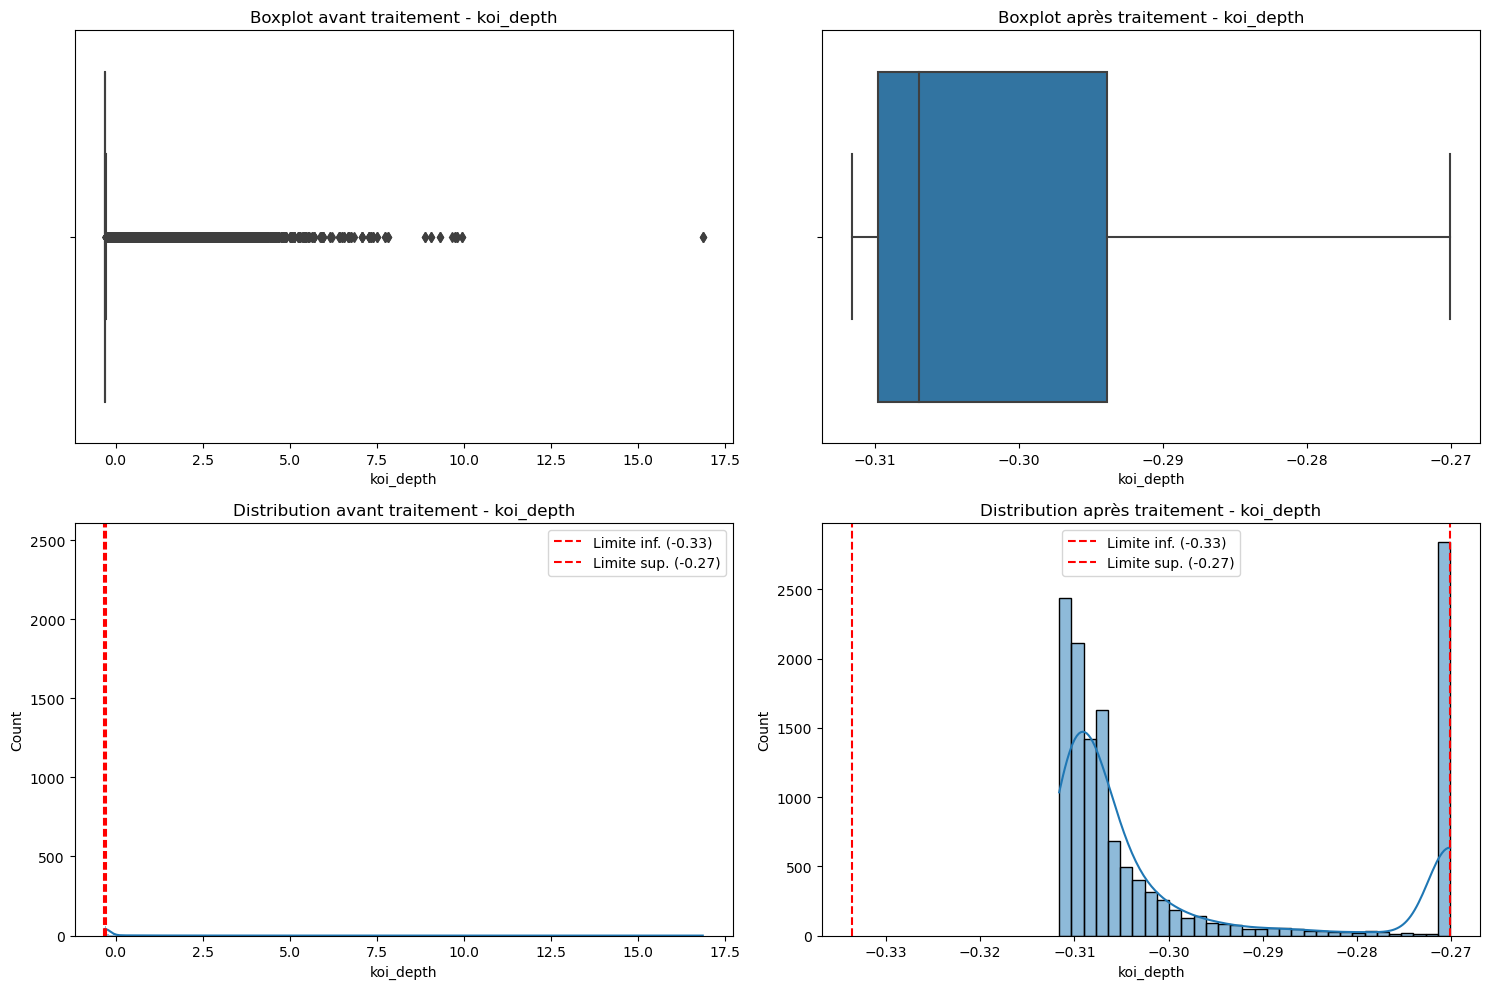


==== Traitement de la colonne 'koi_teq' ====
Statistiques avant traitement:
count    1.379200e+04
mean     7.418660e-17
std      1.000036e+00
min     -1.214599e+00
25%     -6.373621e-01
50%     -2.431239e-01
75%      3.445622e-01
max      1.532533e+01
Name: koi_teq, dtype: float64

Méthode IQR (seuil=1.5):
Q1: -0.64, Q3: 0.34, IQR: 0.98
Limite inférieure: -2.11, Limite supérieure: 1.82

Nombre d'outliers détectés: 616 (4.47% des données)
Exemples de valeurs aberrantes:
[2.1460277057078145, 2.309822968615045, 5.379007308745713, 1.9912694228230512, 1.852325854977607]

Traitement: Écrêtage aux limites (capping)
Valeurs écrêtées à [-2.11, 1.82]

Statistiques après traitement:
count    13792.000000
mean        -0.057339
std          0.759845
min         -1.214599
25%         -0.637362
50%         -0.243124
75%          0.344562
max          1.817449
Name: koi_teq, dtype: float64


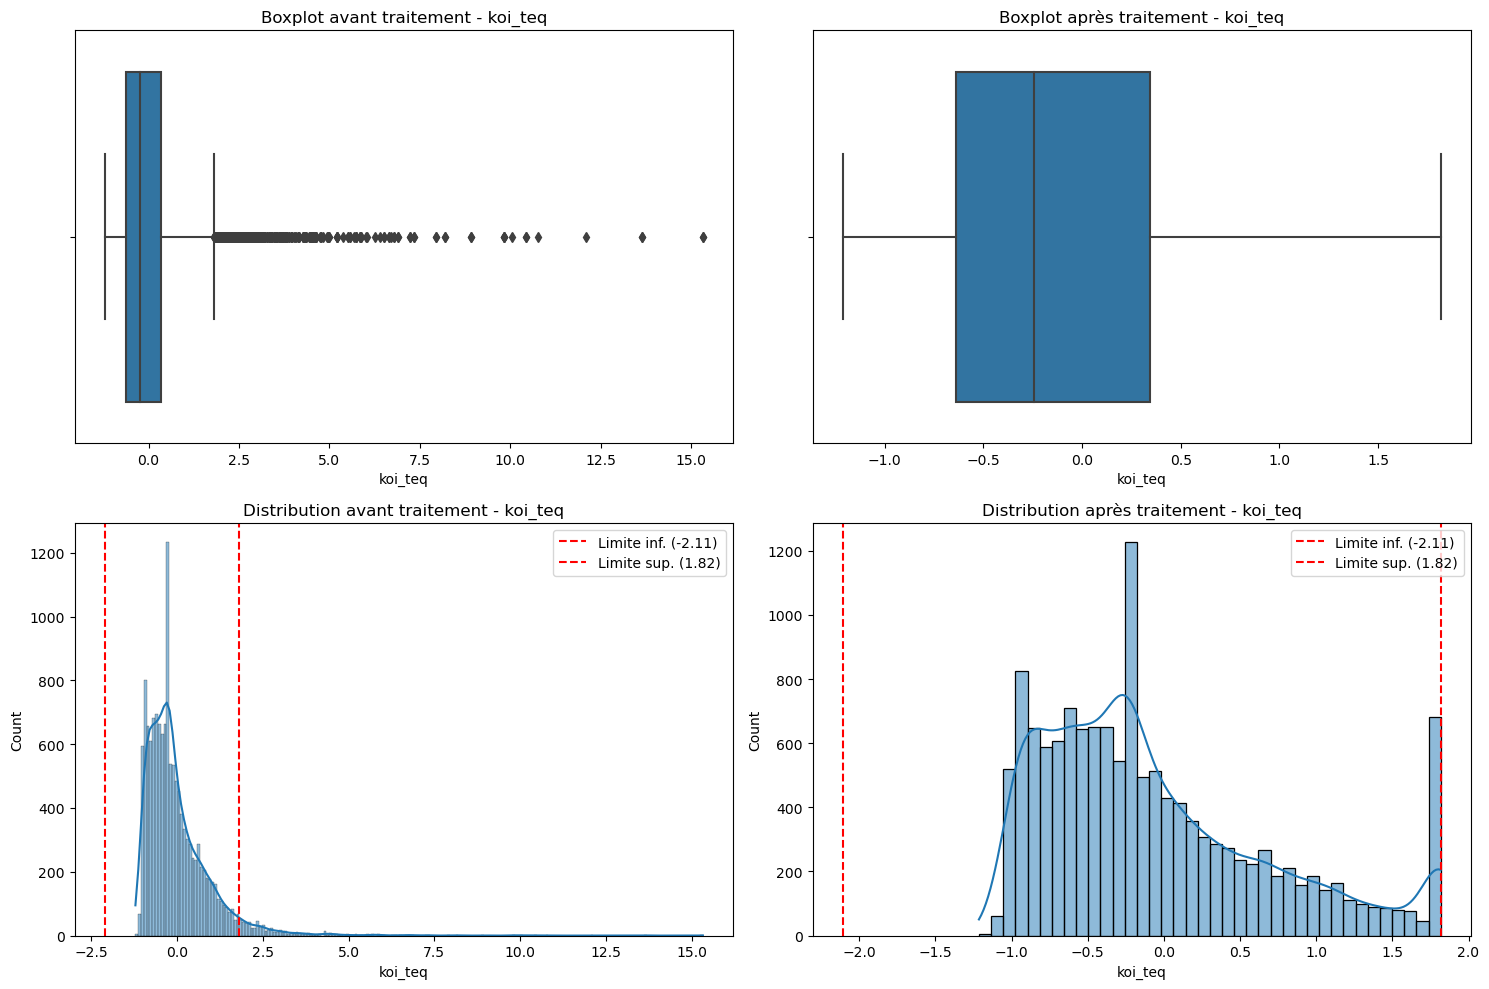


==== Traitement de la colonne 'koi_model_snr' ====
Statistiques avant traitement:
count    1.379200e+04
mean    -3.297182e-17
std      1.000036e+00
min     -3.354886e-01
25%     -3.226359e-01
50%     -3.116030e-01
75%     -2.472825e-01
max      9.963413e+00
Name: koi_model_snr, dtype: float64

Méthode IQR (seuil=1.5):
Q1: -0.32, Q3: -0.25, IQR: 0.08
Limite inférieure: -0.44, Limite supérieure: -0.13

Nombre d'outliers détectés: 2547 (18.47% des données)
Exemples de valeurs aberrantes:
[0.2395856147265507, 4.5602631162950775, 6.427434566152895, 1.6453100268118803, 0.3720938225167772]

Traitement: Écrêtage aux limites (capping)
Valeurs écrêtées à [-0.44, -0.13]

Statistiques après traitement:
count    13792.000000
mean        -0.272335
std          0.072979
min         -0.335489
25%         -0.322636
50%         -0.311603
75%         -0.247283
max         -0.134252
Name: koi_model_snr, dtype: float64


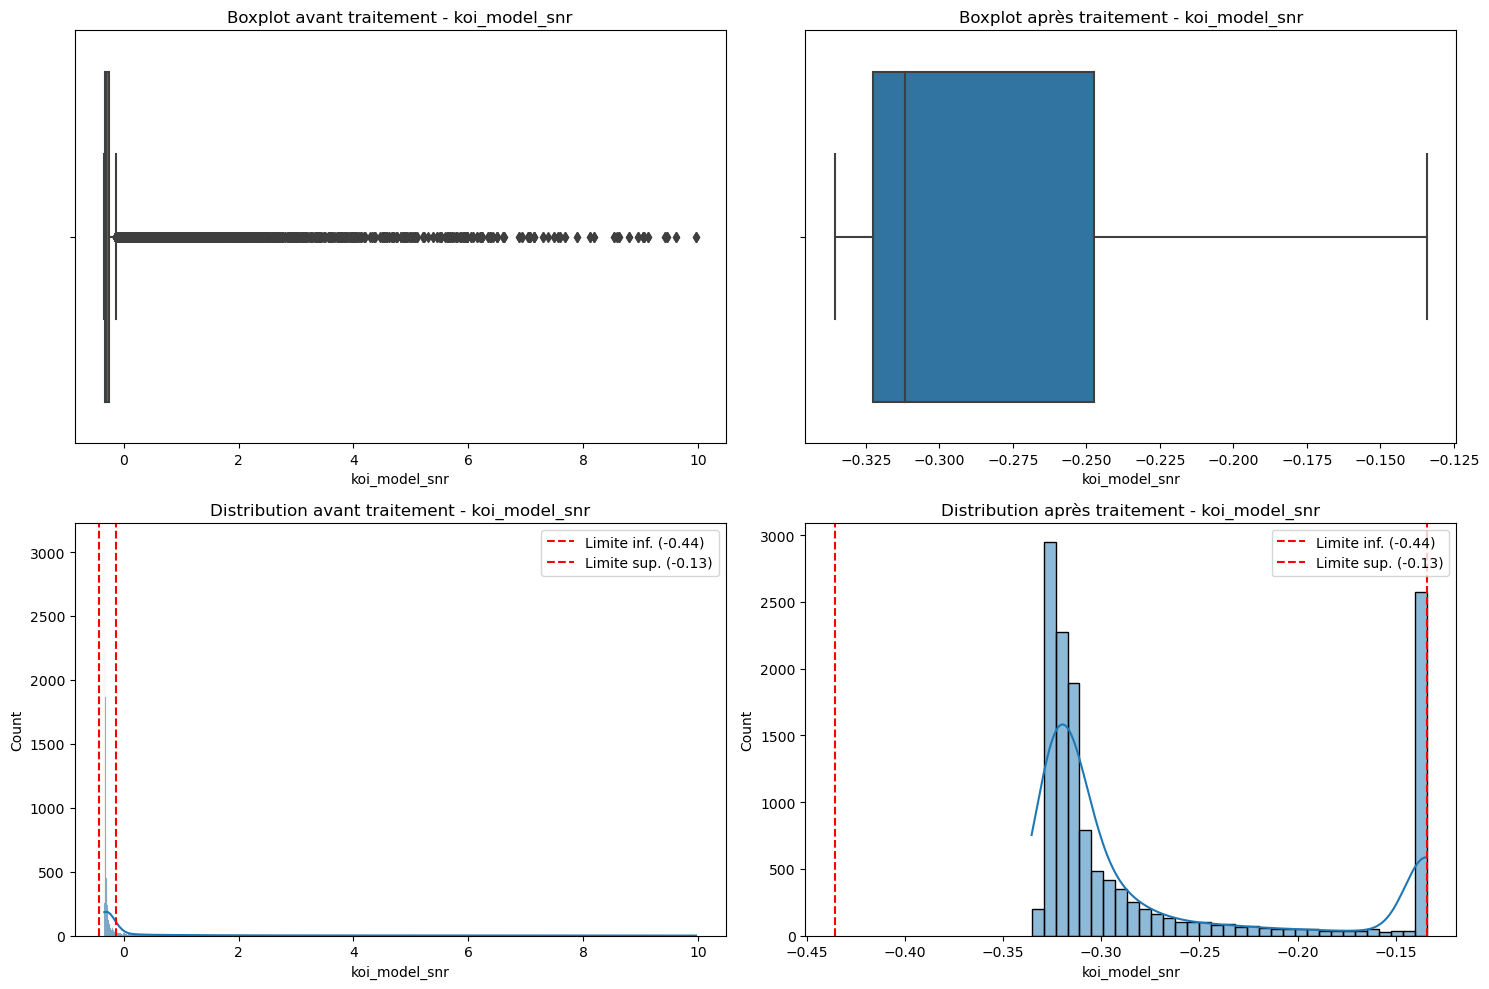


==== Traitement de la colonne 'koi_steff_err1' ====
Statistiques avant traitement:
count    1.379200e+04
mean     7.418660e-17
std      1.000036e+00
min     -3.279631e+00
25%     -7.188434e-01
50%      2.304141e-01
75%      5.615505e-01
max      1.164358e+01
Name: koi_steff_err1, dtype: float64

Méthode IQR (seuil=1.5):
Q1: -0.72, Q3: 0.56, IQR: 1.28
Limite inférieure: -2.64, Limite supérieure: 2.48

Nombre d'outliers détectés: 133 (0.96% des données)
Exemples de valeurs aberrantes:
[2.9015806987285133, 7.338807838389087, 9.082792634574089, 11.643580436567255, 11.643580436567255]

Traitement: Écrêtage aux limites (capping)
Valeurs écrêtées à [-2.64, 2.48]

Statistiques après traitement:
count    13792.000000
mean        -0.012379
std          0.936353
min         -2.639434
25%         -0.718843
50%          0.230414
75%          0.561550
max          2.482141
Name: koi_steff_err1, dtype: float64


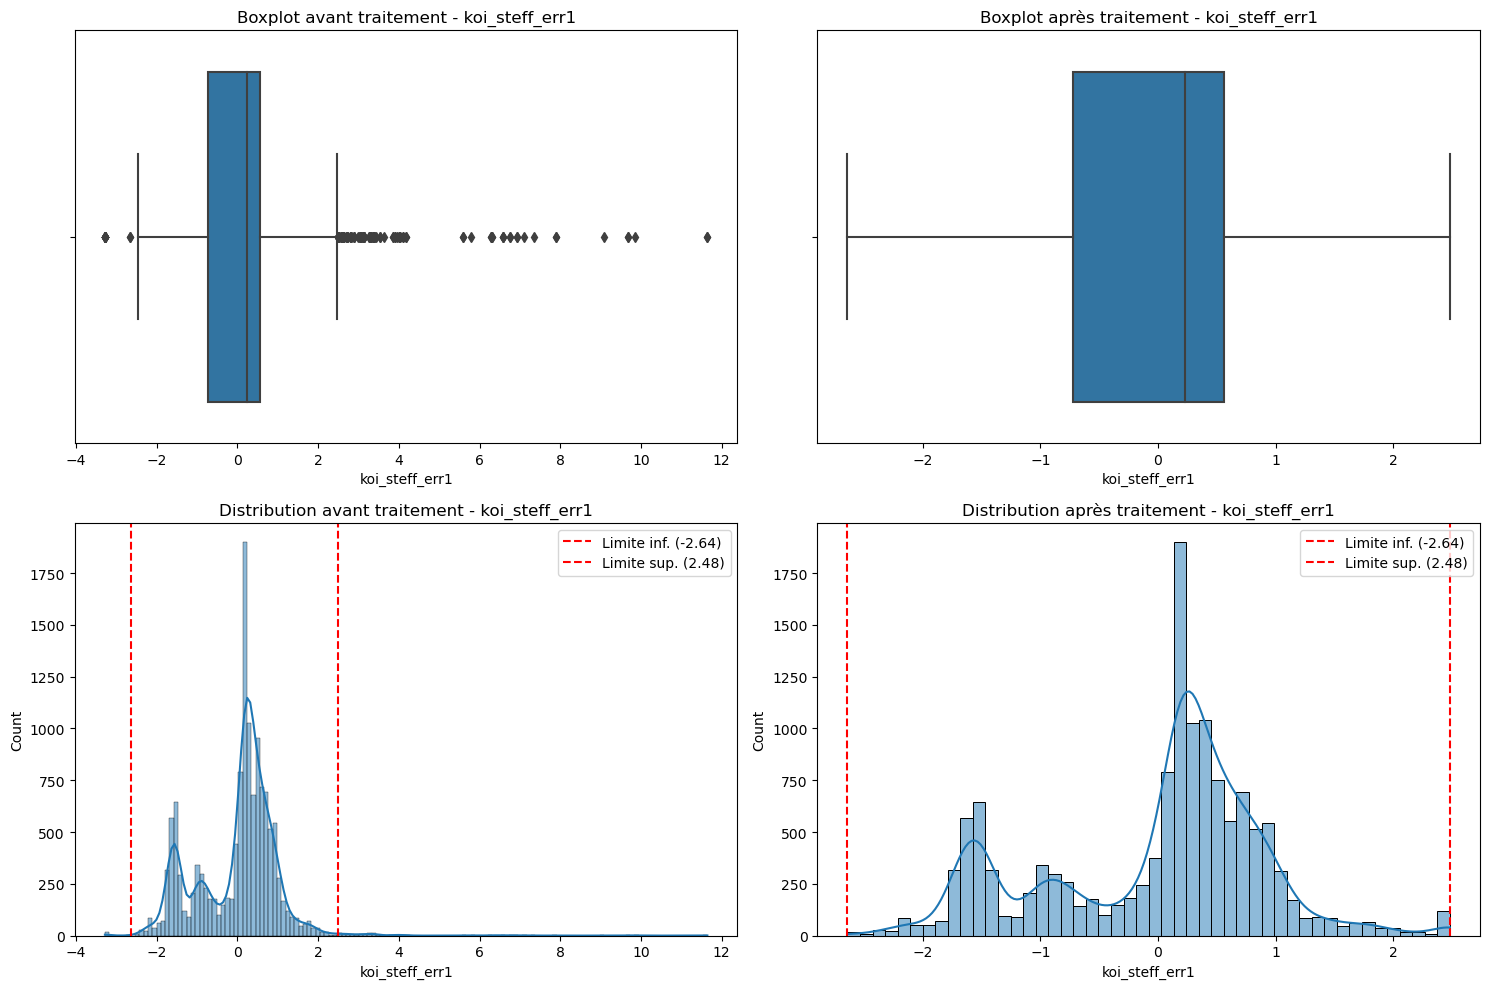


==== Traitement de la colonne 'koi_steff_err2' ====
Statistiques avant traitement:
count    1.379200e+04
mean    -1.813450e-16
std      1.000036e+00
min     -2.196152e+01
25%     -4.256704e-01
50%      2.873052e-02
75%      4.969012e-01
max      2.300735e+00
Name: koi_steff_err2, dtype: float64

Méthode IQR (seuil=1.5):
Q1: -0.43, Q3: 0.50, IQR: 0.92
Limite inférieure: -1.81, Limite supérieure: 1.88

Nombre d'outliers détectés: 523 (3.79% des données)
Exemples de valeurs aberrantes:
[2.300735158850745, -1.843952085290375, -3.427470467603428, -3.427470467603428, 2.300735158850745]

Traitement: Écrêtage aux limites (capping)
Valeurs écrêtées à [-1.81, 1.88]

Statistiques après traitement:
count    13792.000000
mean         0.039206
std          0.775859
min         -1.809528
25%         -0.425670
50%          0.028731
75%          0.496901
max          1.880759
Name: koi_steff_err2, dtype: float64


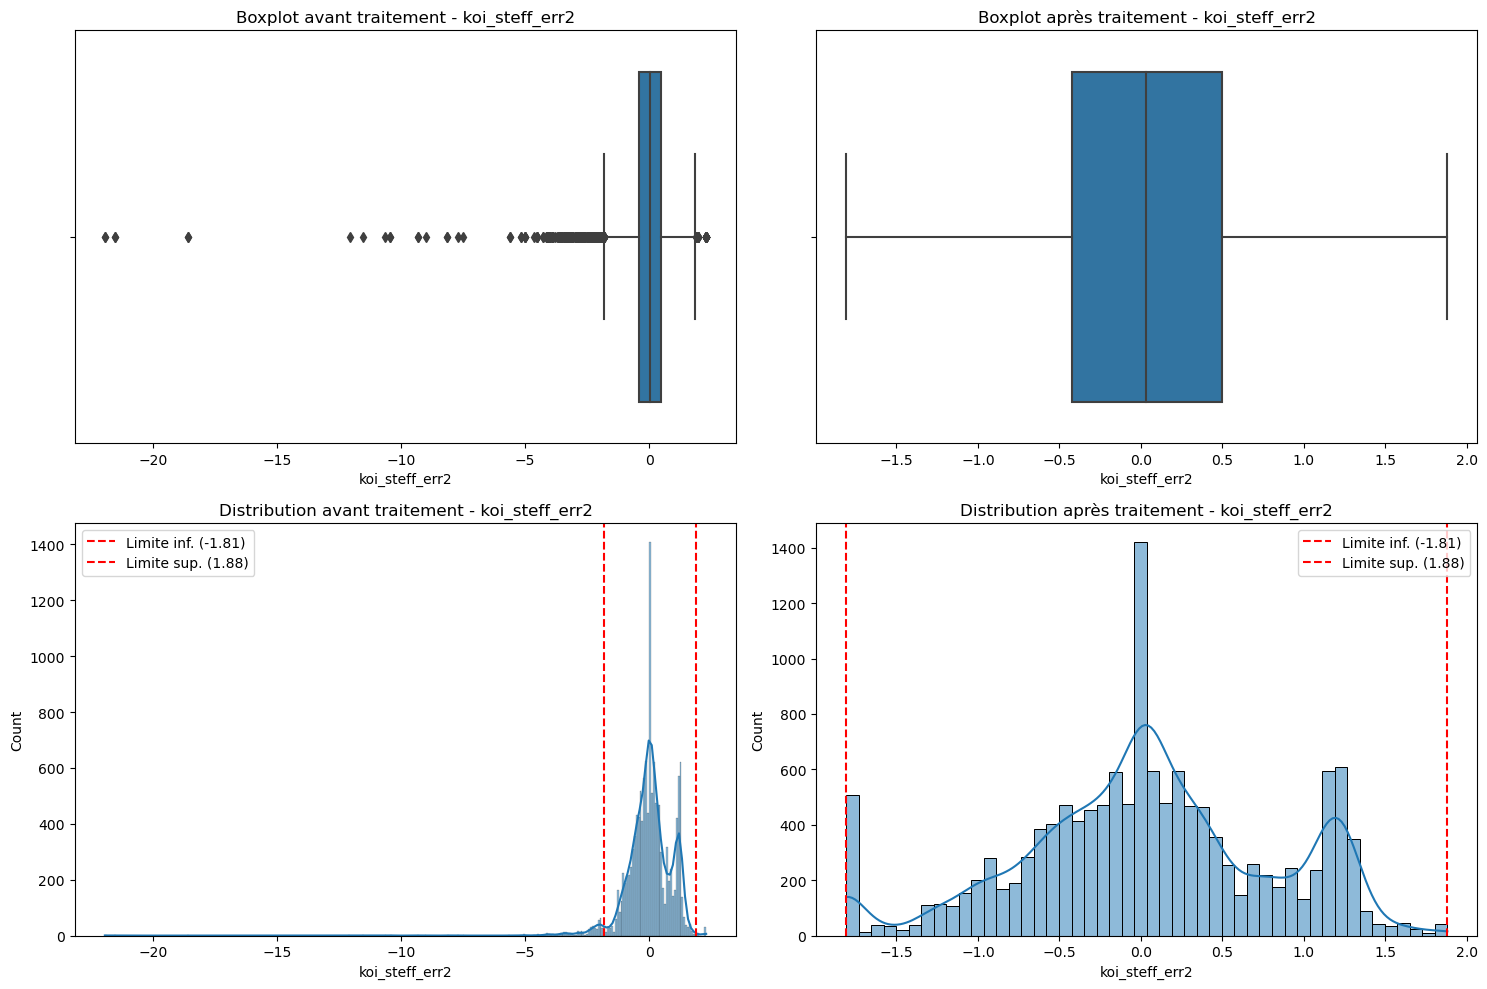


==== Traitement de la colonne 'koi_slogg_err2' ====
Statistiques avant traitement:
count    1.379200e+04
mean    -1.648591e-17
std      1.000036e+00
min     -1.233946e+01
25%     -5.867597e-01
50%      8.881669e-02
75%      6.129708e-01
max      1.719518e+00
Name: koi_slogg_err2, dtype: float64

Méthode IQR (seuil=1.5):
Q1: -0.59, Q3: 0.61, IQR: 1.20
Limite inférieure: -2.39, Limite supérieure: 2.41

Nombre d'outliers détectés: 194 (1.41% des données)
Exemples de valeurs aberrantes:
[-3.1026993051976177, -5.0129497531033325, -5.0129497531033325, -6.993087412517794, -2.4737144016189063]

Traitement: Écrêtage aux limites (capping)
Valeurs écrêtées à [-2.39, 2.41]

Statistiques après traitement:
count    13792.000000
mean         0.021485
std          0.900083
min         -2.386355
25%         -0.586760
50%          0.088817
75%          0.612971
max          1.719518
Name: koi_slogg_err2, dtype: float64


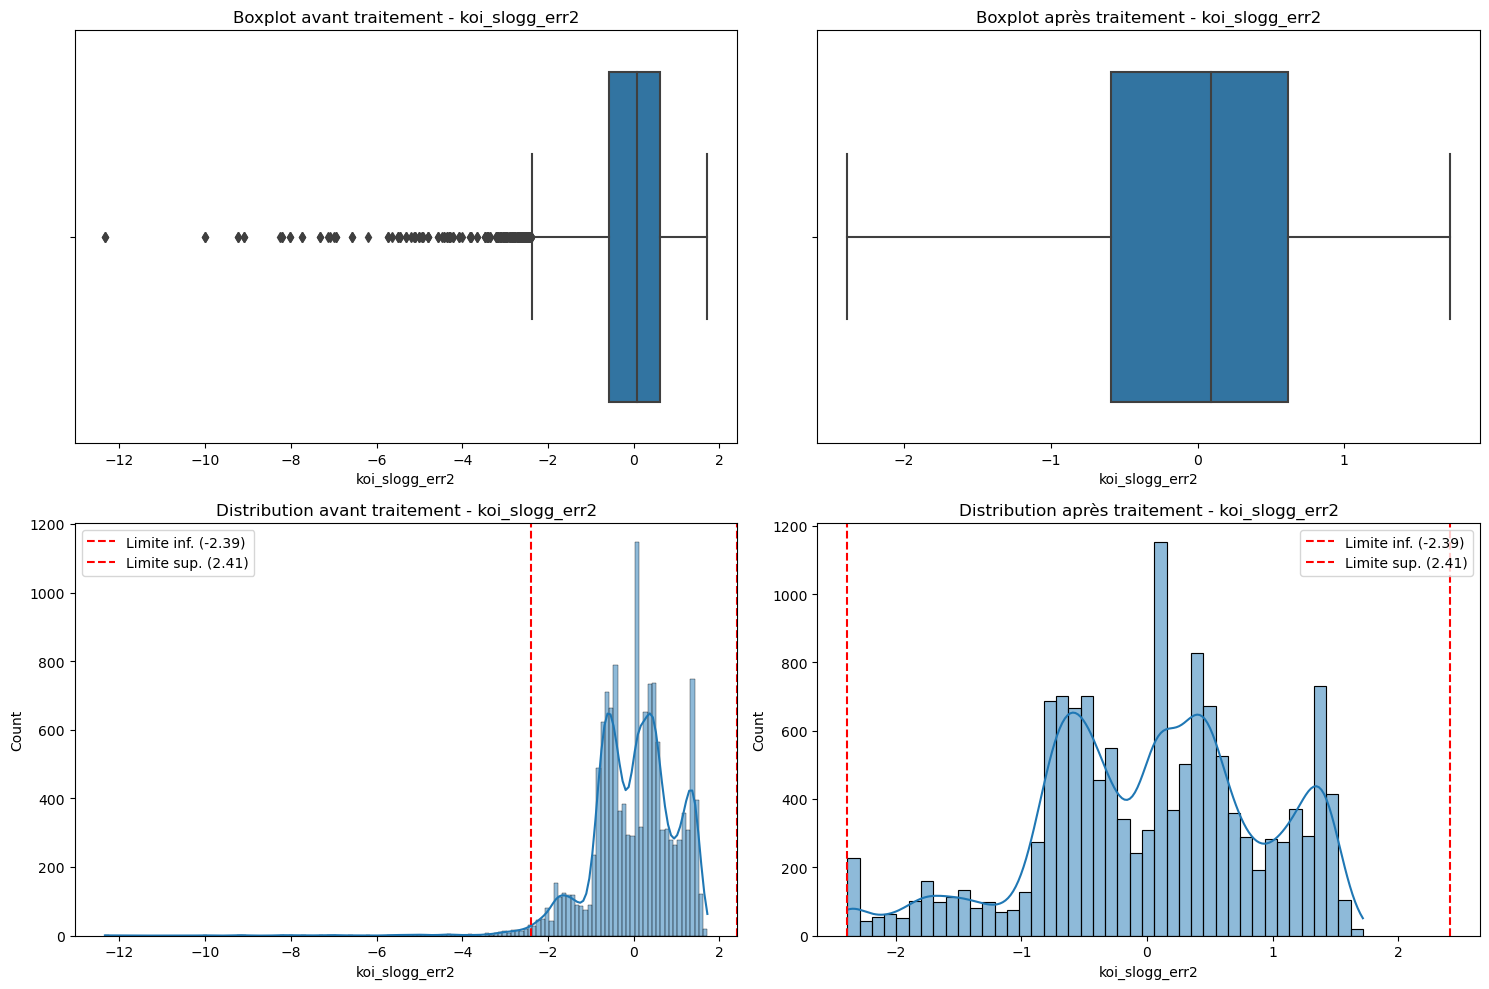

Chargement du fichier data_clean.csv...
Chargement réussi!

Dimensions du jeu de données: 13792 lignes × 16 colonnes

Apperçu des premières lignes:
   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_depth  \
0   1.494829      -0.544839      -0.579918      -0.496667  -0.304760   
1   1.425771      -0.544839      -0.579918      -0.496667  -0.301876   
2  -0.732824      -0.544839       1.724382      -0.496667  -0.191043   
3  -0.732824      -0.544839       1.724382      -0.496667  -0.221660   
4   1.494829      -0.544839      -0.579918      -0.496667  -0.304899   

    koi_teq  koi_model_snr  koi_steff_err1  koi_steff_err2  koi_slogg_err2  \
0 -0.347049      -0.294769       -1.491495        1.185387        0.601323   
1 -0.742417      -0.306143       -1.491495        1.185387        0.601323   
2 -0.522141      -0.248704        0.208338       -0.122736       -0.330507   
3  0.332984       0.239586        0.186263       -0.095197       -0.237324   
4  0.345409      -0.288969   

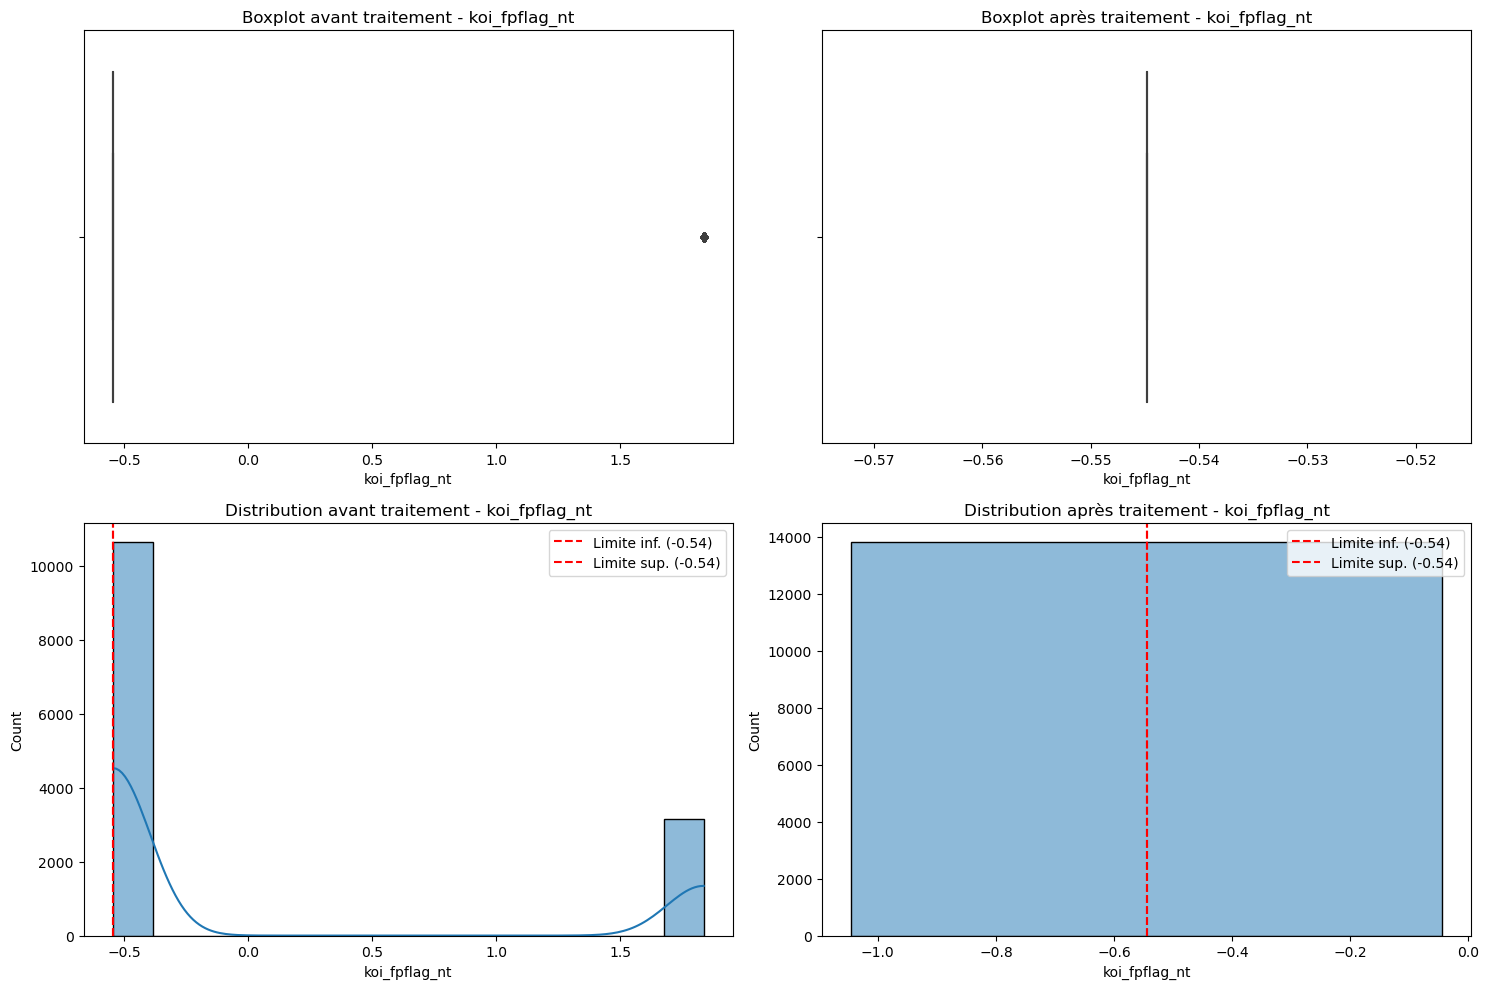


==== Traitement de la colonne 'koi_fpflag_ss' ====
Statistiques avant traitement:
count    1.379200e+04
mean     2.472887e-17
std      1.000036e+00
min     -5.799178e-01
25%     -5.799178e-01
50%     -5.799178e-01
75%      1.724382e+00
max      1.724382e+00
Name: koi_fpflag_ss, dtype: float64

Méthode IQR (seuil=1.5):
Q1: -0.58, Q3: 1.72, IQR: 2.30
Limite inférieure: -4.04, Limite supérieure: 5.18

Nombre d'outliers détectés: 0 (0.00% des données)
Aucun outlier détecté pour la colonne 'koi_fpflag_ss' avec la méthode iqr (seuil=1.5).

==== Traitement de la colonne 'koi_fpflag_co' ====
Statistiques avant traitement:
count    1.379200e+04
mean     5.357921e-17
std      1.000036e+00
min     -4.966670e-01
25%     -4.966670e-01
50%     -4.966670e-01
75%     -4.966670e-01
max      2.013421e+00
Name: koi_fpflag_co, dtype: float64

Méthode IQR (seuil=1.5):
Q1: -0.50, Q3: -0.50, IQR: 0.00
Limite inférieure: -0.50, Limite supérieure: -0.50

Nombre d'outliers détectés: 2729 (19.79% des données)
E

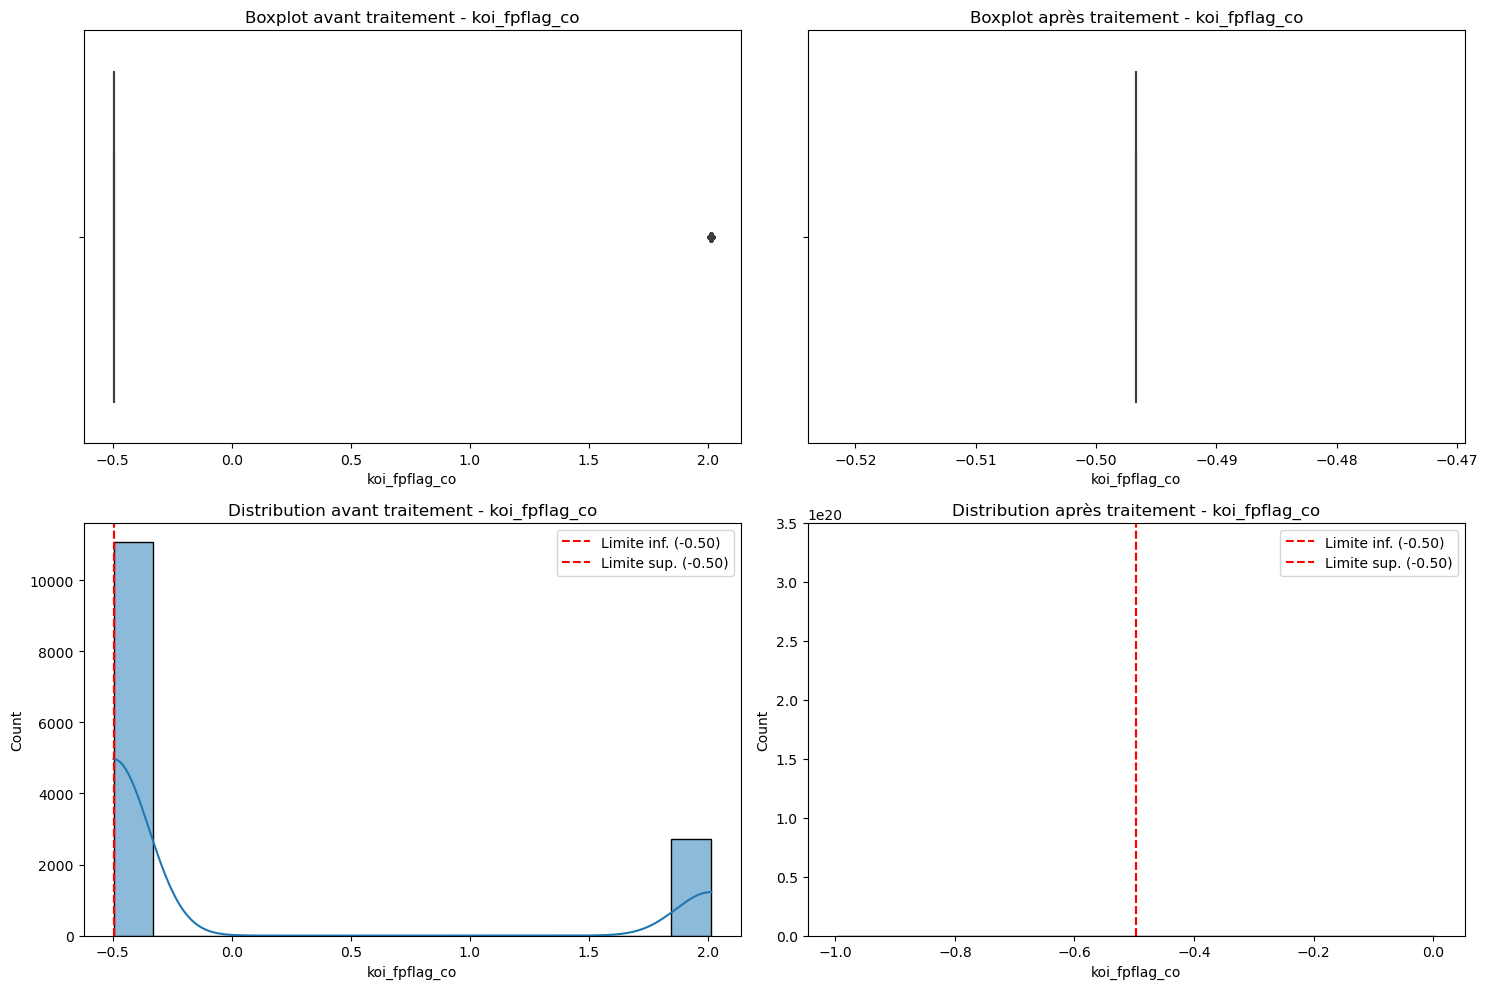


==== Traitement de la colonne 'koi_depth' ====
Statistiques avant traitement:
count    1.379200e+04
mean     9.067251e-17
std      1.000036e+00
min     -3.116164e-01
25%     -3.097987e-01
50%     -3.069623e-01
75%     -2.939109e-01
max      1.685079e+01
Name: koi_depth, dtype: float64

Méthode IQR (seuil=1.5):
Q1: -0.31, Q3: -0.29, IQR: 0.02
Limite inférieure: -0.33, Limite supérieure: -0.27

Nombre d'outliers détectés: 2818 (20.43% des données)
Exemples de valeurs aberrantes:
[-0.1910431330678329, -0.2216602179057485, -0.2568991486656288, -0.1531642609249176, -0.237298335461517]

Traitement: Écrêtage aux limites (capping)
Valeurs écrêtées à [-0.33, -0.27]

Statistiques après traitement:
count    13792.000000
mean        -0.298806
std          0.015655
min         -0.311616
25%         -0.309799
50%         -0.306962
75%         -0.293911
max         -0.270079
Name: koi_depth, dtype: float64


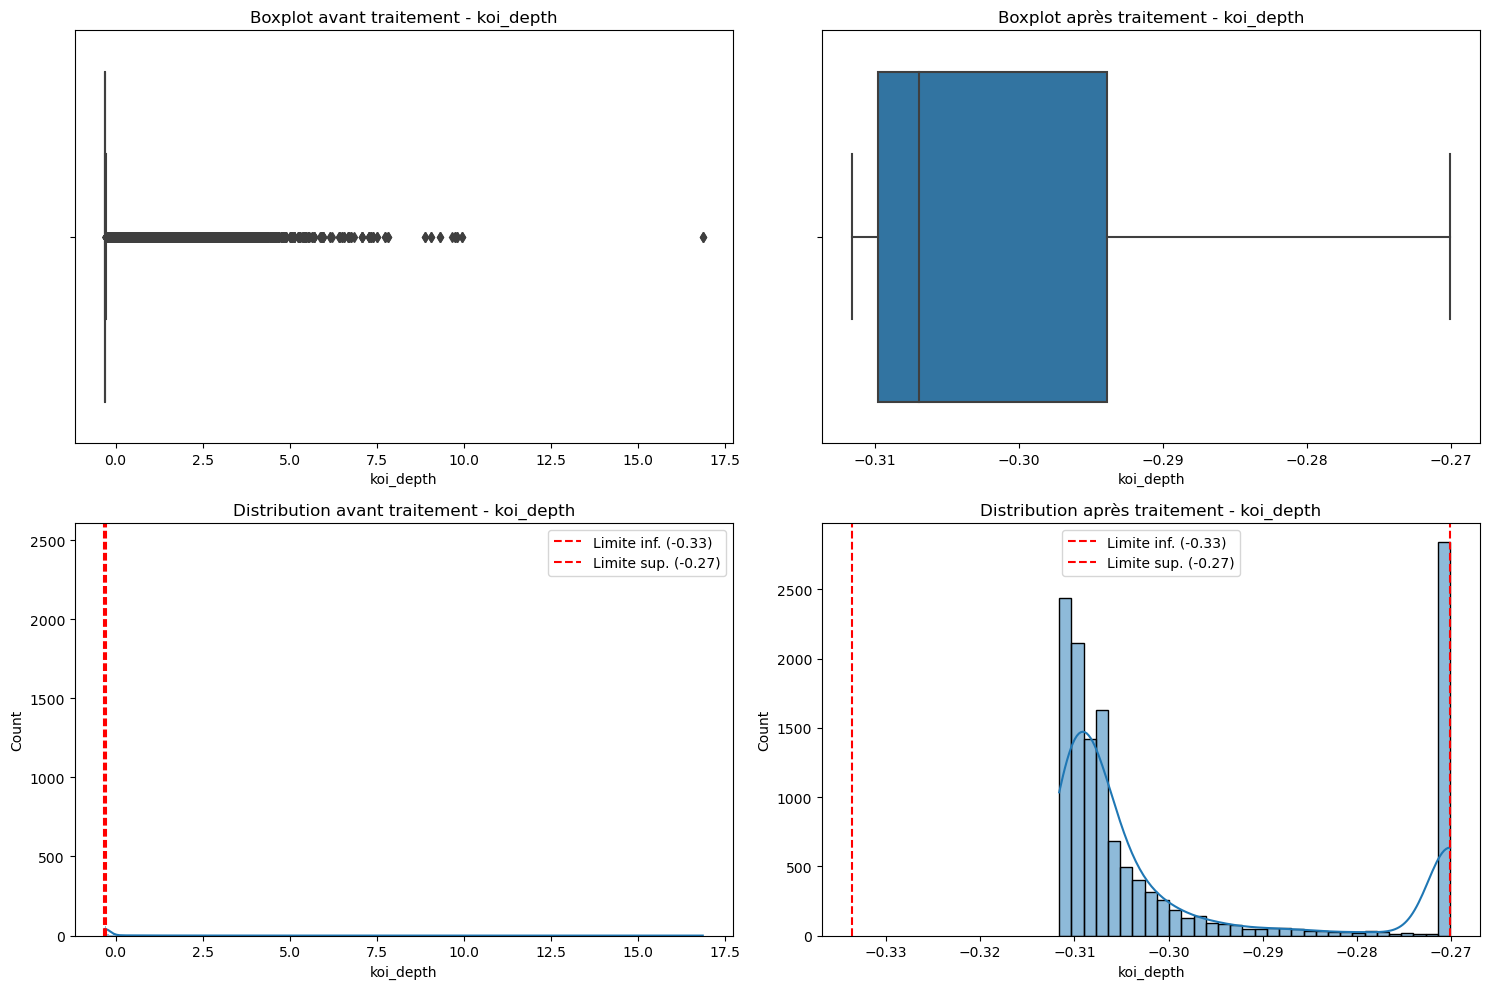


==== Traitement de la colonne 'koi_teq' ====
Statistiques avant traitement:
count    1.379200e+04
mean     7.418660e-17
std      1.000036e+00
min     -1.214599e+00
25%     -6.373621e-01
50%     -2.431239e-01
75%      3.445622e-01
max      1.532533e+01
Name: koi_teq, dtype: float64

Méthode IQR (seuil=1.5):
Q1: -0.64, Q3: 0.34, IQR: 0.98
Limite inférieure: -2.11, Limite supérieure: 1.82

Nombre d'outliers détectés: 616 (4.47% des données)
Exemples de valeurs aberrantes:
[2.1460277057078145, 2.309822968615045, 5.379007308745713, 1.9912694228230512, 1.852325854977607]

Traitement: Écrêtage aux limites (capping)
Valeurs écrêtées à [-2.11, 1.82]

Statistiques après traitement:
count    13792.000000
mean        -0.057339
std          0.759845
min         -1.214599
25%         -0.637362
50%         -0.243124
75%          0.344562
max          1.817449
Name: koi_teq, dtype: float64


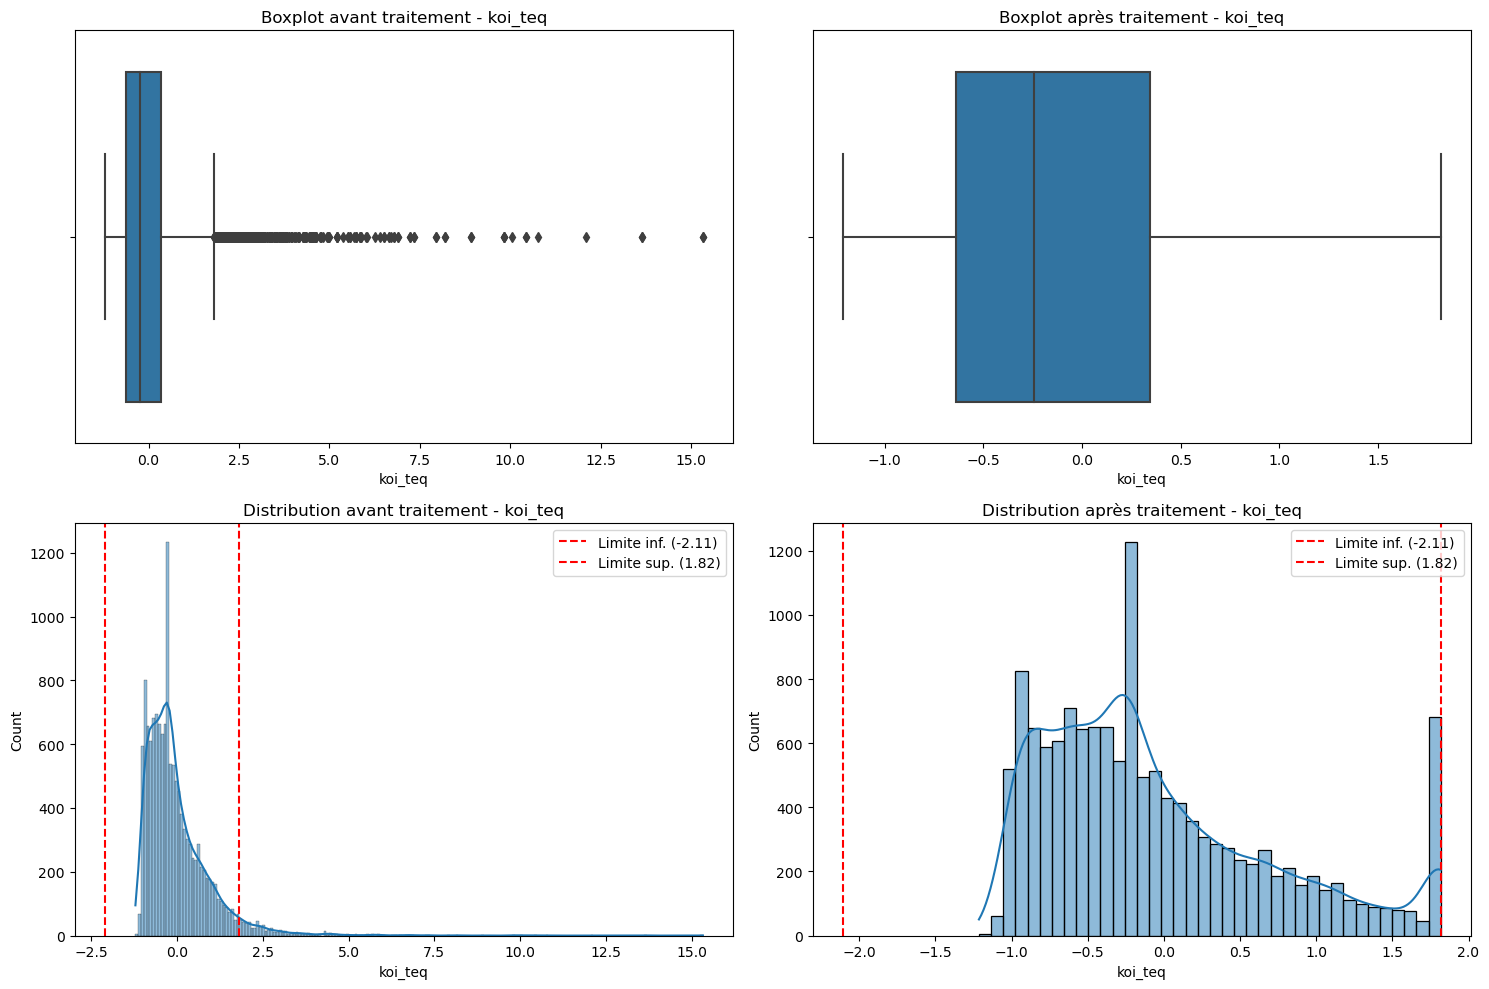


==== Traitement de la colonne 'koi_model_snr' ====
Statistiques avant traitement:
count    1.379200e+04
mean    -3.297182e-17
std      1.000036e+00
min     -3.354886e-01
25%     -3.226359e-01
50%     -3.116030e-01
75%     -2.472825e-01
max      9.963413e+00
Name: koi_model_snr, dtype: float64

Méthode IQR (seuil=1.5):
Q1: -0.32, Q3: -0.25, IQR: 0.08
Limite inférieure: -0.44, Limite supérieure: -0.13

Nombre d'outliers détectés: 2547 (18.47% des données)
Exemples de valeurs aberrantes:
[0.2395856147265507, 4.5602631162950775, 6.427434566152895, 1.6453100268118803, 0.3720938225167772]

Traitement: Écrêtage aux limites (capping)
Valeurs écrêtées à [-0.44, -0.13]

Statistiques après traitement:
count    13792.000000
mean        -0.272335
std          0.072979
min         -0.335489
25%         -0.322636
50%         -0.311603
75%         -0.247283
max         -0.134252
Name: koi_model_snr, dtype: float64


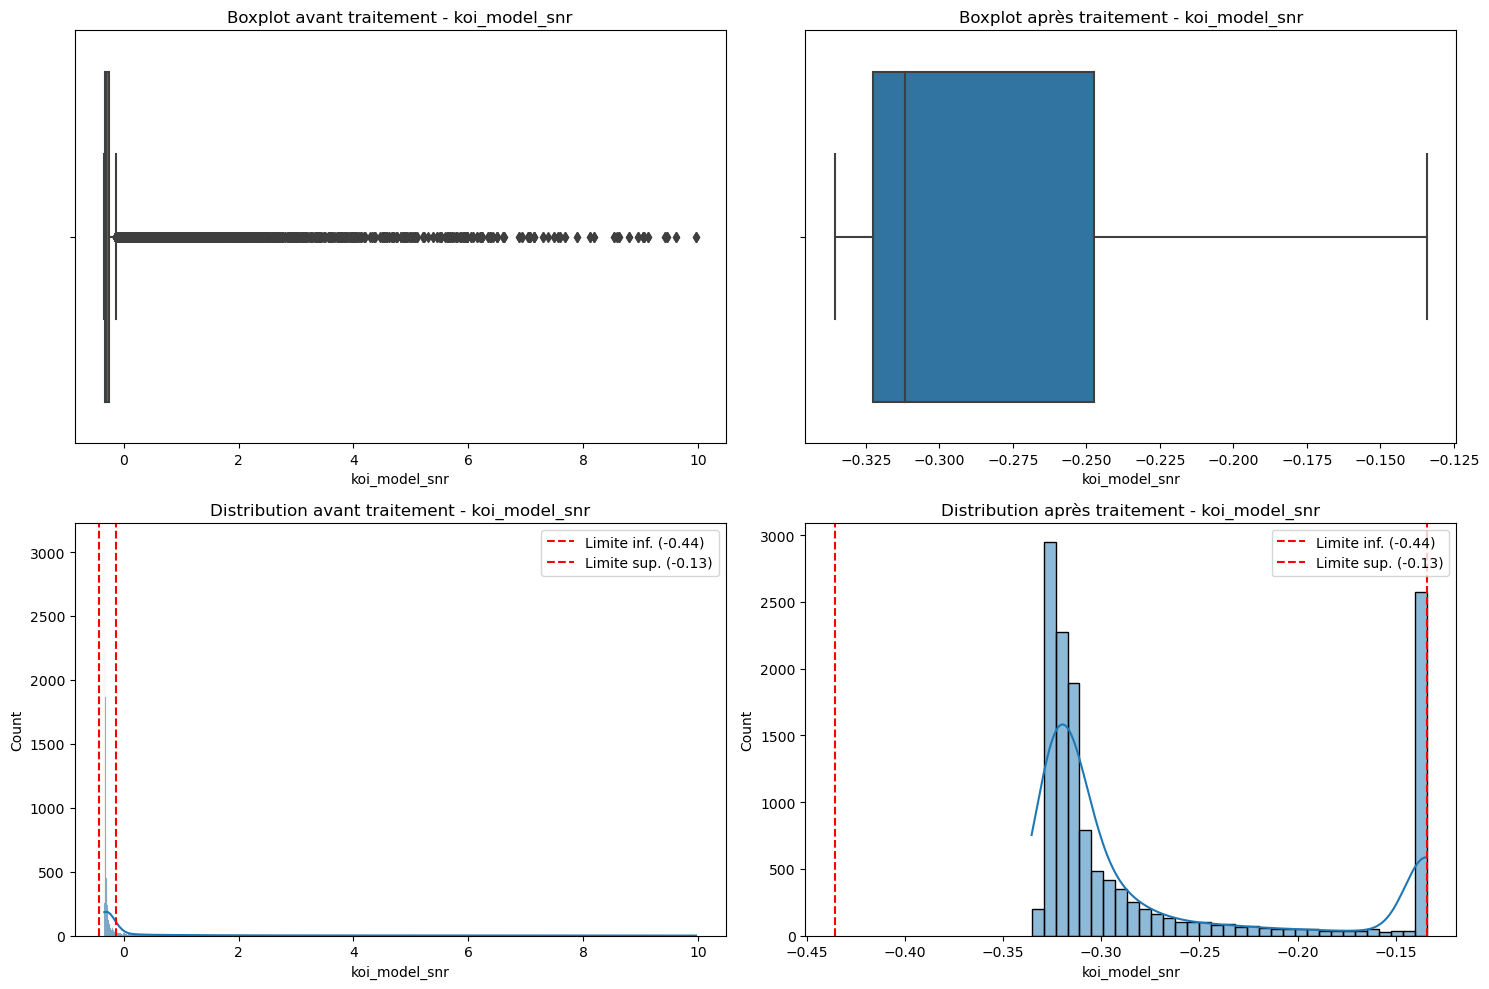


==== Traitement de la colonne 'koi_steff_err1' ====
Statistiques avant traitement:
count    1.379200e+04
mean     7.418660e-17
std      1.000036e+00
min     -3.279631e+00
25%     -7.188434e-01
50%      2.304141e-01
75%      5.615505e-01
max      1.164358e+01
Name: koi_steff_err1, dtype: float64

Méthode IQR (seuil=1.5):
Q1: -0.72, Q3: 0.56, IQR: 1.28
Limite inférieure: -2.64, Limite supérieure: 2.48

Nombre d'outliers détectés: 133 (0.96% des données)
Exemples de valeurs aberrantes:
[2.9015806987285133, 7.338807838389087, 9.082792634574089, 11.643580436567255, 11.643580436567255]

Traitement: Écrêtage aux limites (capping)
Valeurs écrêtées à [-2.64, 2.48]

Statistiques après traitement:
count    13792.000000
mean        -0.012379
std          0.936353
min         -2.639434
25%         -0.718843
50%          0.230414
75%          0.561550
max          2.482141
Name: koi_steff_err1, dtype: float64


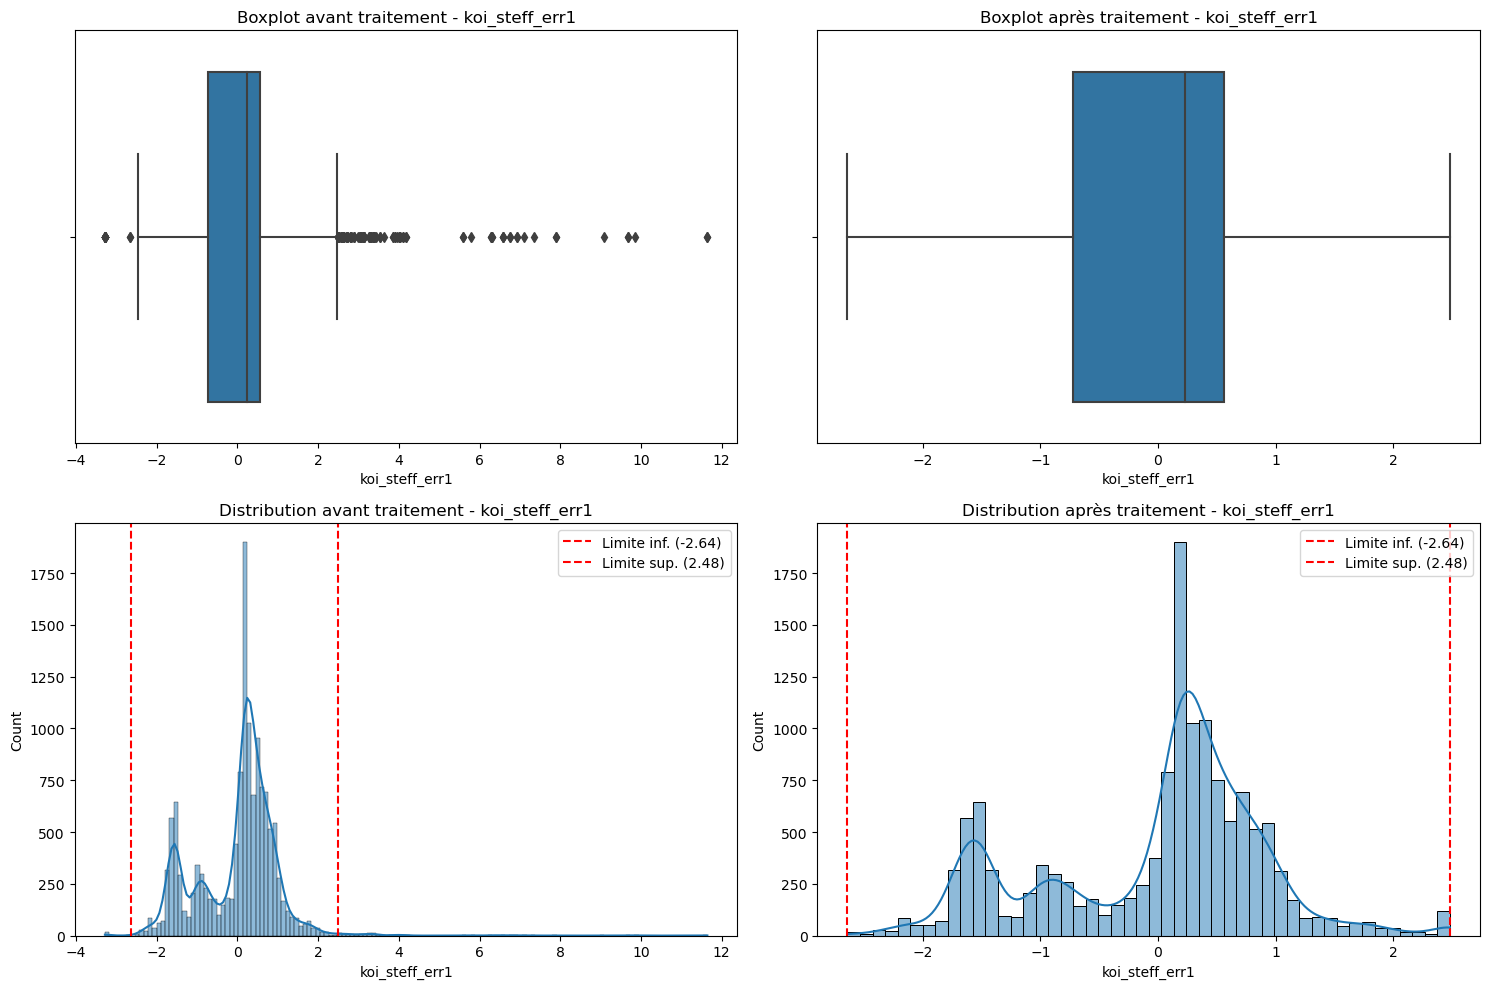


==== Traitement de la colonne 'koi_steff_err2' ====
Statistiques avant traitement:
count    1.379200e+04
mean    -1.813450e-16
std      1.000036e+00
min     -2.196152e+01
25%     -4.256704e-01
50%      2.873052e-02
75%      4.969012e-01
max      2.300735e+00
Name: koi_steff_err2, dtype: float64

Méthode IQR (seuil=1.5):
Q1: -0.43, Q3: 0.50, IQR: 0.92
Limite inférieure: -1.81, Limite supérieure: 1.88

Nombre d'outliers détectés: 523 (3.79% des données)
Exemples de valeurs aberrantes:
[2.300735158850745, -1.843952085290375, -3.427470467603428, -3.427470467603428, 2.300735158850745]

Traitement: Écrêtage aux limites (capping)
Valeurs écrêtées à [-1.81, 1.88]

Statistiques après traitement:
count    13792.000000
mean         0.039206
std          0.775859
min         -1.809528
25%         -0.425670
50%          0.028731
75%          0.496901
max          1.880759
Name: koi_steff_err2, dtype: float64


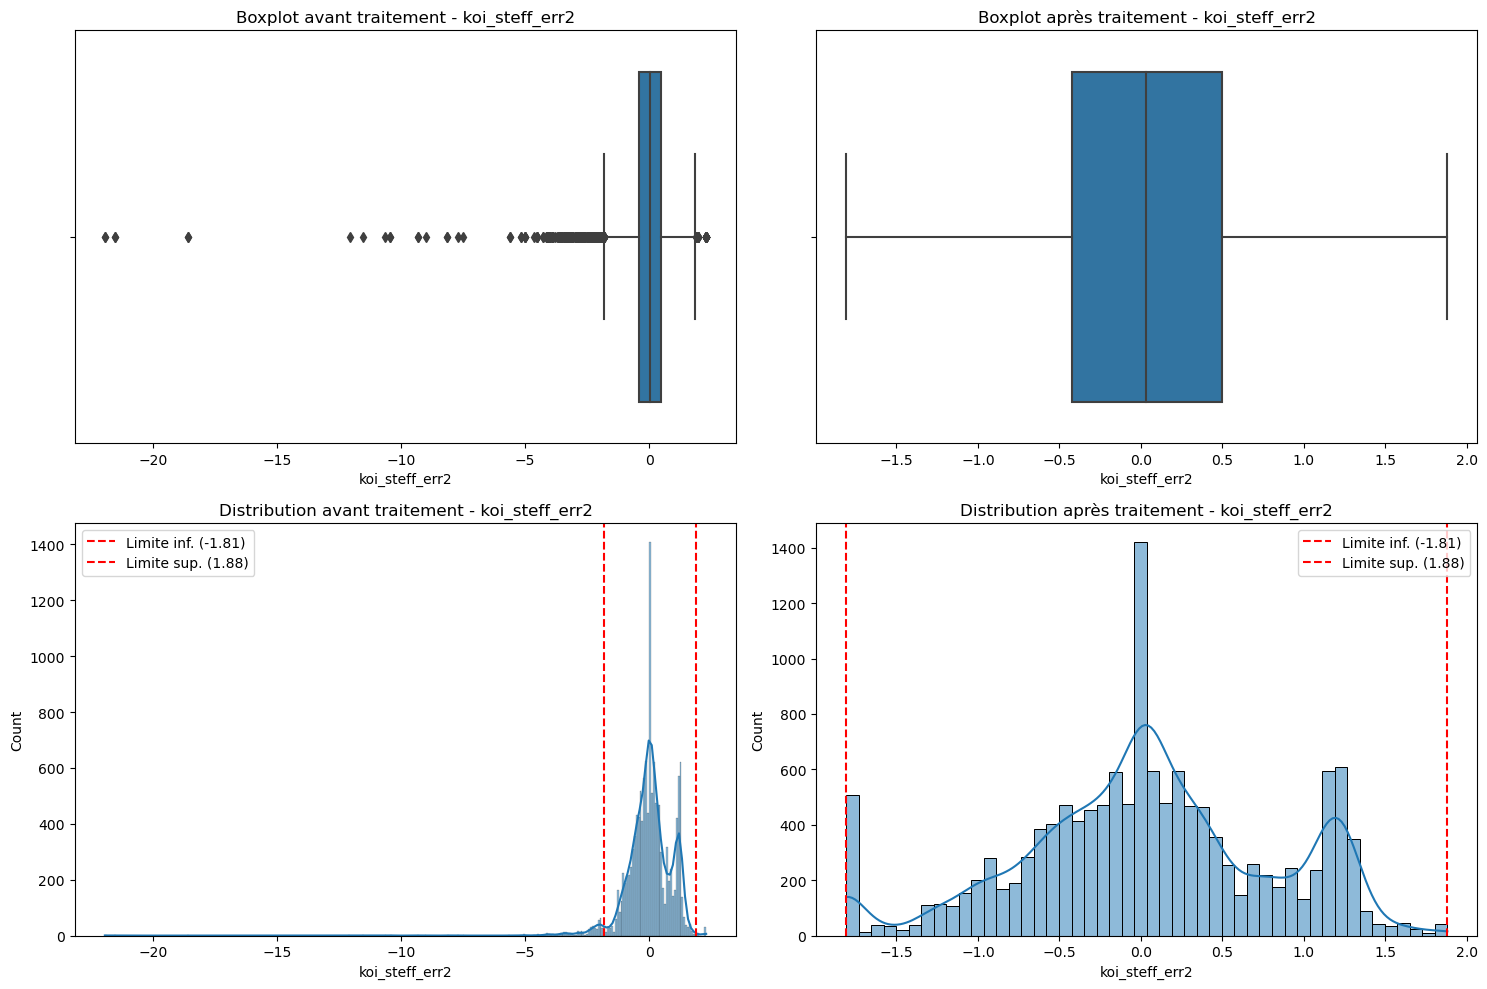


==== Traitement de la colonne 'koi_slogg_err2' ====
Statistiques avant traitement:
count    1.379200e+04
mean    -1.648591e-17
std      1.000036e+00
min     -1.233946e+01
25%     -5.867597e-01
50%      8.881669e-02
75%      6.129708e-01
max      1.719518e+00
Name: koi_slogg_err2, dtype: float64

Méthode IQR (seuil=1.5):
Q1: -0.59, Q3: 0.61, IQR: 1.20
Limite inférieure: -2.39, Limite supérieure: 2.41

Nombre d'outliers détectés: 194 (1.41% des données)
Exemples de valeurs aberrantes:
[-3.1026993051976177, -5.0129497531033325, -5.0129497531033325, -6.993087412517794, -2.4737144016189063]

Traitement: Écrêtage aux limites (capping)
Valeurs écrêtées à [-2.39, 2.41]

Statistiques après traitement:
count    13792.000000
mean         0.021485
std          0.900083
min         -2.386355
25%         -0.586760
50%          0.088817
75%          0.612971
max          1.719518
Name: koi_slogg_err2, dtype: float64


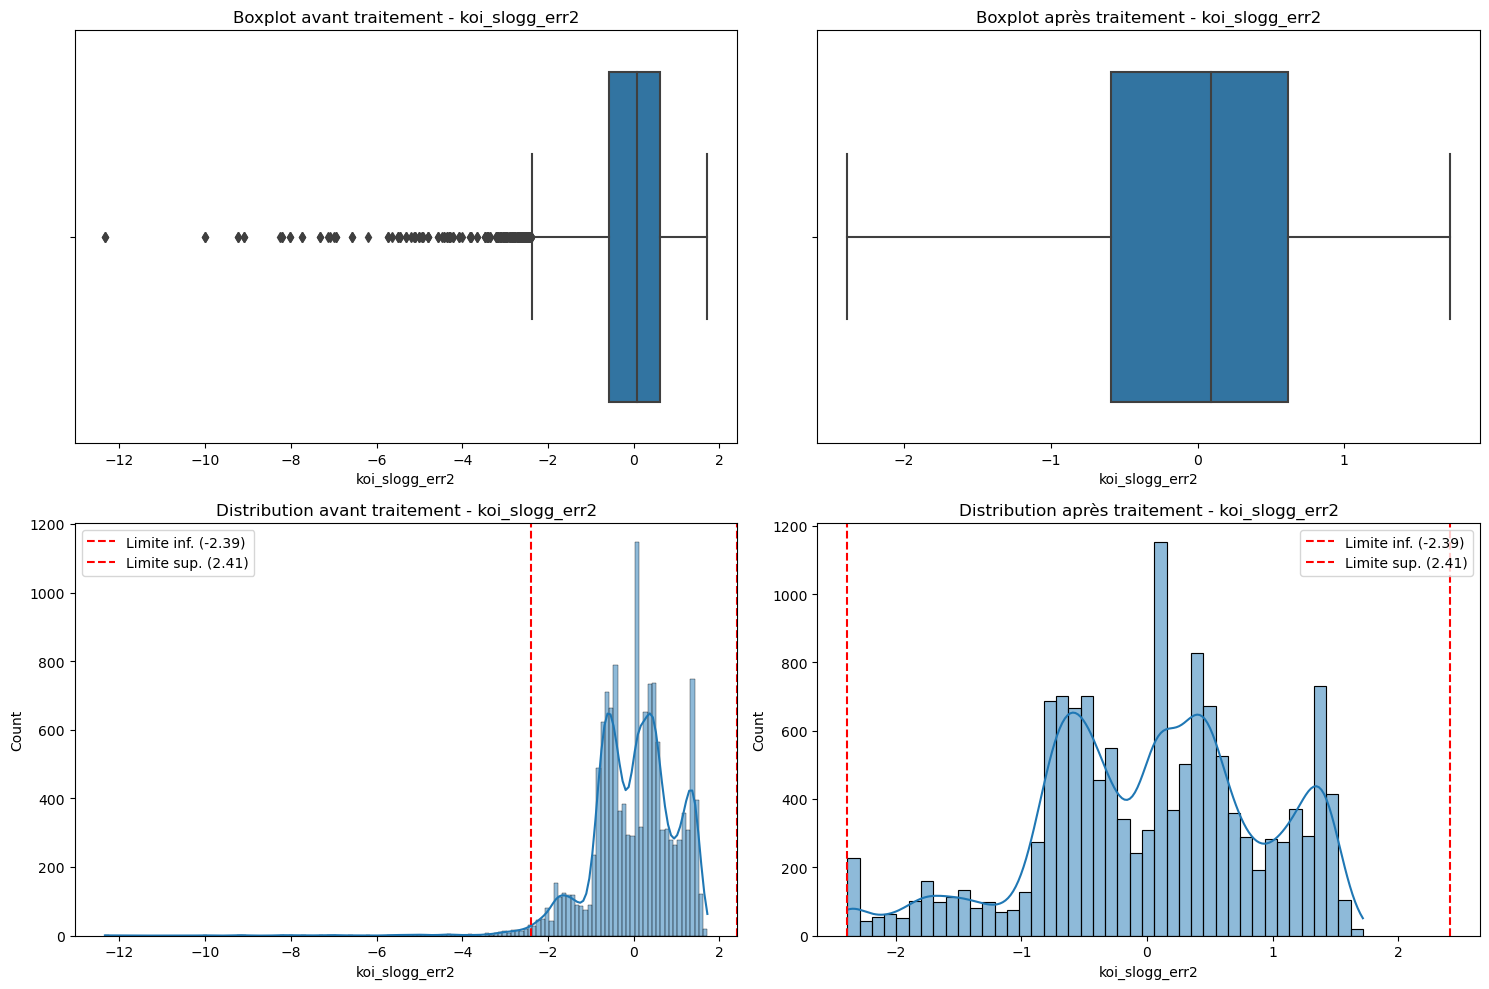

In [8]:
def traiter_outliers_data_clean(fichier_csv, colonne_cible=None, methode='iqr', 
                               seuil=1.5, traitement='cap', afficher_plots=True):
    """
    Traite les valeurs aberrantes dans un fichier CSV.
    
    Paramètres:
    fichier_csv (str): Chemin vers le fichier data_clean.csv
    colonne_cible (str ou list): Colonne(s) à traiter. Si None, traite toutes les colonnes numériques
    methode (str): 'iqr' ou 'zscore' - Méthode de détection des outliers
    seuil (float): Seuil pour la détection (1.5 pour IQR, 2 ou 3 pour Z-score)
    traitement (str): 'cap', 'median', 'mean', 'drop' - Méthode de traitement des outliers
    afficher_plots (bool): Si True, affiche des visualisations
    
    Retourne:
    DataFrame: Les données après traitement des outliers
    """
    # Charger le fichier
    print(f"Chargement du fichier {fichier_csv}...")
    try:
        df = pd.read_csv(fichier_csv)
        print("Chargement réussi!")
    except Exception as e:
        print(f"Erreur lors du chargement du fichier: {e}")
        return None
    
    # Afficher des informations sur les données
    print(f"\nDimensions du jeu de données: {df.shape[0]} lignes × {df.shape[1]} colonnes")
    print("\nApperçu des premières lignes:")
    print(df.head())
    
    # Sélectionner les colonnes à traiter
    colonnes_numeriques = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if colonne_cible is None:
        colonnes_a_traiter = colonnes_numeriques
        print(f"\nAucune colonne spécifiée, traitement de toutes les colonnes numériques: {colonnes_a_traiter}")
    elif isinstance(colonne_cible, str):
        if colonne_cible in df.columns:
            colonnes_a_traiter = [colonne_cible]
            print(f"\nTraitement de la colonne: {colonne_cible}")
        else:
            print(f"Erreur: La colonne '{colonne_cible}' n'existe pas. Colonnes disponibles: {df.columns.tolist()}")
            return None
    elif isinstance(colonne_cible, list):
        colonnes_invalides = [col for col in colonne_cible if col not in df.columns]
        if colonnes_invalides:
            print(f"Erreur: Les colonnes suivantes n'existent pas: {colonnes_invalides}")
            return None
        colonnes_a_traiter = colonne_cible
        print(f"\nTraitement des colonnes: {colonnes_a_traiter}")
    
    # Dataframe pour stocker les résultats
    df_resultat = df.copy()
    
    # Traiter chaque colonne
    for colonne in colonnes_a_traiter:
        print(f"\n==== Traitement de la colonne '{colonne}' ====")
        
        # Vérifier si la colonne est numérique
        if df[colonne].dtype not in [np.int64, np.float64, np.int32, np.float32]:
            print(f"La colonne '{colonne}' n'est pas numérique (type: {df[colonne].dtype}). Colonne ignorée.")
            continue
        
        # Statistiques avant traitement
        print(f"Statistiques avant traitement:")
        stats_avant = df[colonne].describe()
        print(stats_avant)
        
        # Détecter les outliers selon la méthode choisie
        if methode == 'iqr':
            Q1 = df[colonne].quantile(0.25)
            Q3 = df[colonne].quantile(0.75)
            IQR = Q3 - Q1
            limite_inf = Q1 - seuil * IQR
            limite_sup = Q3 + seuil * IQR
            print(f"\nMéthode IQR (seuil={seuil}):")
            print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
            print(f"Limite inférieure: {limite_inf:.2f}, Limite supérieure: {limite_sup:.2f}")
            
            # Identifier les outliers
            mask_outliers = (df[colonne] < limite_inf) | (df[colonne] > limite_sup)
        
        elif methode == 'zscore':
            moyenne = df[colonne].mean()
            ecart_type = df[colonne].std()
            z_scores = np.abs((df[colonne] - moyenne) / ecart_type)
            limite_inf = moyenne - seuil * ecart_type
            limite_sup = moyenne + seuil * ecart_type
            print(f"\nMéthode Z-score (seuil={seuil}):")
            print(f"Moyenne: {moyenne:.2f}, Écart-type: {ecart_type:.2f}")
            print(f"Limite inférieure: {limite_inf:.2f}, Limite supérieure: {limite_sup:.2f}")
            
            # Identifier les outliers
            mask_outliers = z_scores > seuil
        
        else:
            print(f"Erreur: Méthode de détection '{methode}' non reconnue. Utilisation de 'iqr'.")
            Q1 = df[colonne].quantile(0.25)
            Q3 = df[colonne].quantile(0.75)
            IQR = Q3 - Q1
            limite_inf = Q1 - seuil * IQR
            limite_sup = Q3 + seuil * IQR
            mask_outliers = (df[colonne] < limite_inf) | (df[colonne] > limite_sup)
        
        # Compter les outliers
        nb_outliers = mask_outliers.sum()
        pourcentage_outliers = (nb_outliers / len(df)) * 100
        print(f"\nNombre d'outliers détectés: {nb_outliers} ({pourcentage_outliers:.2f}% des données)")
        
        if nb_outliers > 0:
            print("Exemples de valeurs aberrantes:")
            print(df.loc[mask_outliers, colonne].head(5).tolist())
            
            # Traiter les outliers selon la méthode choisie
            if traitement == 'drop':
                print("\nTraitement: Suppression des outliers")
                df_resultat = df_resultat[~mask_outliers]
                print(f"Nombre d'observations après suppression: {len(df_resultat)}")
                
            elif traitement == 'mean':
                print("\nTraitement: Remplacement par la moyenne")
                valeur_moyenne = df.loc[~mask_outliers, colonne].mean()
                df_resultat.loc[mask_outliers, colonne] = valeur_moyenne
                print(f"Valeur de remplacement (moyenne): {valeur_moyenne:.2f}")
                
            elif traitement == 'median':
                print("\nTraitement: Remplacement par la médiane")
                valeur_mediane = df.loc[~mask_outliers, colonne].median()
                df_resultat.loc[mask_outliers, colonne] = valeur_mediane
                print(f"Valeur de remplacement (médiane): {valeur_mediane:.2f}")
                
            elif traitement == 'cap':
                print("\nTraitement: Écrêtage aux limites (capping)")
                df_resultat.loc[df_resultat[colonne] < limite_inf, colonne] = limite_inf
                df_resultat.loc[df_resultat[colonne] > limite_sup, colonne] = limite_sup
                print(f"Valeurs écrêtées à [{limite_inf:.2f}, {limite_sup:.2f}]")
                
            else:
                print(f"Erreur: Méthode de traitement '{traitement}' non reconnue. Utilisation de 'cap'.")
                df_resultat.loc[df_resultat[colonne] < limite_inf, colonne] = limite_inf
                df_resultat.loc[df_resultat[colonne] > limite_sup, colonne] = limite_sup
            
            # Statistiques après traitement
            print(f"\nStatistiques après traitement:")
            stats_apres = df_resultat[colonne].describe()
            print(stats_apres)
            
            # Visualiser avant/après traitement
            if afficher_plots:
                plt.figure(figsize=(15, 10))
                
                # Boxplot avant/après
                plt.subplot(2, 2, 1)
                sns.boxplot(x=df[colonne])
                plt.title(f'Boxplot avant traitement - {colonne}')
                
                plt.subplot(2, 2, 2)
                sns.boxplot(x=df_resultat[colonne])
                plt.title(f'Boxplot après traitement - {colonne}')
                
                # Histogramme avant/après
                plt.subplot(2, 2, 3)
                sns.histplot(df[colonne], kde=True)
                plt.axvline(x=limite_inf, color='r', linestyle='--', label=f'Limite inf. ({limite_inf:.2f})')
                plt.axvline(x=limite_sup, color='r', linestyle='--', label=f'Limite sup. ({limite_sup:.2f})')
                plt.legend()
                plt.title(f'Distribution avant traitement - {colonne}')
                
                plt.subplot(2, 2, 4)
                sns.histplot(df_resultat[colonne], kde=True)
                if traitement != 'drop':
                    plt.axvline(x=limite_inf, color='r', linestyle='--', label=f'Limite inf. ({limite_inf:.2f})')
                    plt.axvline(x=limite_sup, color='r', linestyle='--', label=f'Limite sup. ({limite_sup:.2f})')
                    plt.legend()
                plt.title(f'Distribution après traitement - {colonne}')
                
                plt.tight_layout()
                plt.show()
        else:
            print(f"Aucun outlier détecté pour la colonne '{colonne}' avec la méthode {methode} (seuil={seuil}).")
    
    # Bilan final
    if traitement == 'drop':
        print(f"\n=== Bilan final ===")
        nb_total_avant = len(df)
        nb_total_apres = len(df_resultat)
        nb_lignes_supprimees = nb_total_avant - nb_total_apres
        pourcentage_supprime = (nb_lignes_supprimees / nb_total_avant) * 100
        print(f"Nombre total d'observations avant traitement: {nb_total_avant}")
        print(f"Nombre total d'observations après traitement: {nb_total_apres}")
        print(f"Nombre de lignes supprimées: {nb_lignes_supprimees} ({pourcentage_supprime:.2f}%)")
    
    return df_resultat

if __name__ == "__main__":
    # Pour utiliser la fonction, simplement appeler:
    df_sans_outliers = traiter_outliers_data_clean('data_clean.csv')
    
    # Pour spécifier une colonne particulière:
    # df_sans_outliers = traiter_outliers_data_clean('data_clean.csv', 'nom_colonne')
    
    # Pour spécifier plusieurs colonnes:
    # df_sans_outliers = traiter_outliers_data_clean('data_clean.csv', ['colonne1', 'colonne2'])
    
    # Pour changer la méthode de détection et le traitement:
    # df_sans_outliers = traiter_outliers_data_clean('data_clean.csv', methode='zscore', seuil=3, traitement='median')
    
    # Pour désactiver les visualisations:
    # df_sans_outliers = traiter_outliers_data_clean('data_clean.csv', afficher_plots=False)
    
    # Pour sauvegarder le résultat:
    df_sans_outliers = traiter_outliers_data_clean('data_clean.csv')
    # if df_sans_outliers is not None:
    #     df_sans_outliers.to_csv('data_clean_sans_outliers.csv', index=False)

## Notebook 3: Modélisation


=== Random Forest ===
[[ 646    0    0]
 [   0  483    0]
 [   0    0 1630]]
                precision    recall  f1-score   support

     CANDIDATE       1.00      1.00      1.00       646
     CONFIRMED       1.00      1.00      1.00       483
FALSE POSITIVE       1.00      1.00      1.00      1630

      accuracy                           1.00      2759
     macro avg       1.00      1.00      1.00      2759
  weighted avg       1.00      1.00      1.00      2759


=== KNN ===
[[ 646    0    0]
 [   1  479    3]
 [   0    0 1630]]
                precision    recall  f1-score   support

     CANDIDATE       1.00      1.00      1.00       646
     CONFIRMED       1.00      0.99      1.00       483
FALSE POSITIVE       1.00      1.00      1.00      1630

      accuracy                           1.00      2759
     macro avg       1.00      1.00      1.00      2759
  weighted avg       1.00      1.00      1.00      2759


=== Naive Bayes ===
[[ 646    0    0]
 [   1  482    0]
 [   0 

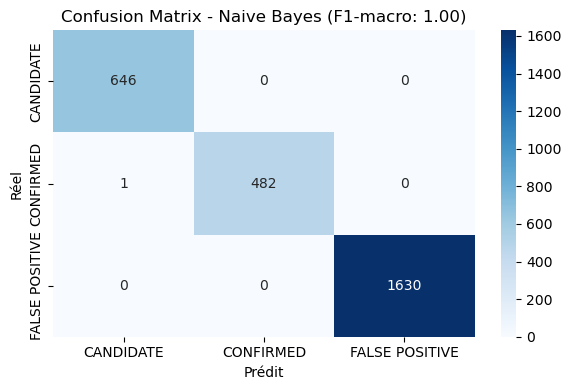


=== Naive Bayes ===
                precision    recall  f1-score   support

     CANDIDATE       1.00      1.00      1.00       646
     CONFIRMED       1.00      1.00      1.00       483
FALSE POSITIVE       1.00      1.00      1.00      1630

      accuracy                           1.00      2759
     macro avg       1.00      1.00      1.00      2759
  weighted avg       1.00      1.00      1.00      2759



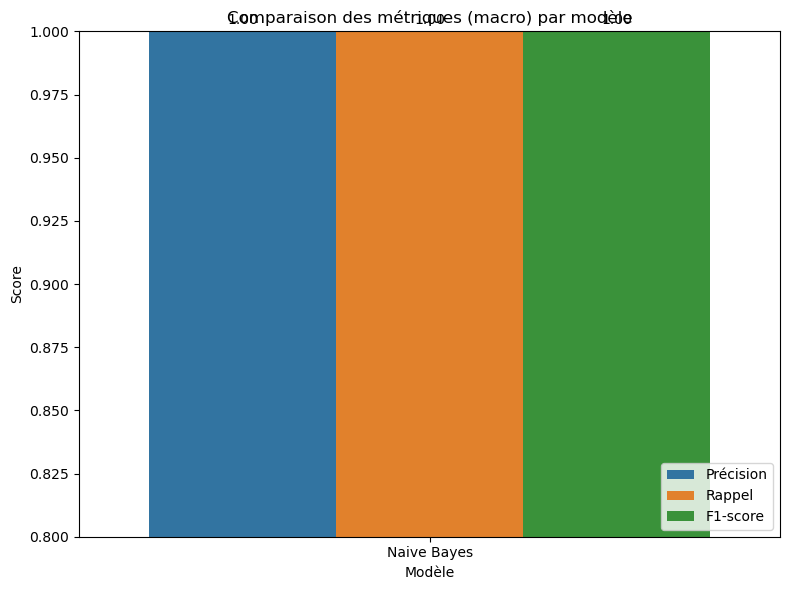


✅ Meilleur modèle : Naive Bayes avec F1-macro = 1.00
📁 Modèle sauvegardé sous : naive_bayes_model.pkl


In [11]:
#Chargement des données traités
#df = pd.read_csv("data_clean.csv")
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import joblib 

df = df_sans_outliers

#Préparation des données pour la modélisation
X = df.drop(columns=["koi_disposition"])
y = df["koi_disposition"]

# Scale the features (missing in original code)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Label encoding pour la vible
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Modélisation
# 1.Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

#2.K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

#3.Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Évaluation des modèles
models = {
    "Random Forest": y_pred_rf,
    "KNN": y_pred_knn,
    "Naive Bayes": y_pred_nb
}

for name, y_pred in models.items():
    print(f"\n=== {name} ===")
    print(confusion_matrix(y_test, y_pred))
    #Utiliser le nom de la classe du labelencoder
    print(classification_report(y_test, y_pred, target_names=list(le.classes_)))


# Dictionnaire des modèles
model_objects = {
    "Random Forest": rf,
    "KNN": knn,
    "Naive Bayes": nb
}

# Initialiser les scores pour trouver le meilleur modèle
f1_scores = {}

# Tracer les matrices de confusion
for name, model in model_objects.items():
    y_pred = model.predict(X_test)
    
# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')  # f1 macro
f1_scores[name] = f1

# Affichage
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f"Confusion Matrix - {name} (F1-macro: {f1:.2f})")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.show()

print(f"\n=== {name} ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))

#Diagramme a barres

# Stocker les métriques
metrics_data = []

for name, model in model_objects.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
    
#Récupération des scores
metrics_data.append({
    "Modèle": name,
    "Précision": round(report["macro avg"]["precision"], 2),
    "Rappel": round(report["macro avg"]["recall"], 2),
    "F1-score": round(report["macro avg"]["f1-score"], 2)
    })

# Créer un DataFrame pour les métriques
df_metrics = pd.DataFrame(metrics_data)

# Convertir en format long
df_melted = df_metrics.melt(id_vars="Modèle", var_name="Métrique", value_name="Score")

# Tracer le diagramme
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_melted, x="Modèle", y="Score", hue="Métrique")

# Ajouter les étiquettes de valeur sur chaque barre
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", padding=3)

# Affichage
plt.title("Comparaison des métriques (macro) par modèle")
plt.ylim(0.80, 1.00)
plt.ylabel("Score")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Trouver le meilleur modèle
best_model_name = max(f1_scores, key=f1_scores.get)
best_model = model_objects[best_model_name]

print(f"\n✅ Meilleur modèle : {best_model_name} avec F1-macro = {f1_scores[best_model_name]:.2f}")

# Sauvegarde du meilleur modèle
joblib.dump(best_model, f"{best_model_name.replace(' ', '_').lower()}_model.pkl")
print(f"📁 Modèle sauvegardé sous : {best_model_name.replace(' ', '_').lower()}_model.pkl")

